In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pylab as plt
import seaborn
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Explore and clean data

## Data Explore

In [3]:
#Loading the dataset
data = pd.read_csv("gdrive/MyDrive/GroupProject/Dataset/processed_data_merged_linze.csv")
data

,id,types,name,details,neighbourhood_cleansed,neighbourhood_group_cleansed,picture_url,latitude,longitude,room_type,...,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths,bath_type,studio
0,71609,Villa,Villa in Tampines,2 bedrooms · 3 beds · 1 private bath,Tampines,East Region,https://a0.muscache.com/pictures/24453191/3580...,1.345370,103.958870,Private room,...,0,0,0,0,0,2.0,3.0,1.0,private,0
1,71896,Home,Home in Tampines,1 bedroom · 1 bed · Shared half-bath,Tampines,East Region,https://a0.muscache.com/pictures/2440674/ac4f4...,1.347540,103.959580,Private room,...,0,0,0,0,0,1.0,1.0,0.5,shared,0
2,71903,Home,Home in Tampines,1 bedroom · 2 beds · Shared half-bath,Tampines,East Region,https://a0.muscache.com/pictures/568743/7bc623...,1.345310,103.961000,Private room,...,0,0,0,0,0,1.0,2.0,0.5,shared,0
3,275343,Rental unit,Rental unit in Bukit Merah,1 bedroom · 1 bed · 2 shared baths,Bukit Merah,Central Region,https://a0.muscache.com/pictures/miso/Hosting-...,1.290150,103.808140,Private room,...,0,0,0,1,0,1.0,1.0,2.0,shared,0
4,275344,Rental unit,Rental unit in Bukit Merah,1 bedroom · 1 bed · 2.5 shared baths,Bukit Merah,Central Region,https://a0.muscache.com/pictures/miso/Hosting-...,1.288360,103.811440,Private room,...,1,0,0,1,0,1.0,1.0,2.5,shared,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,920638892602895042,Rental unit,Rental unit in Tanglin,1 bedroom · 1 bed · 1 bath,Tanglin,Central Region,https://a0.muscache.com/pictures/miso/Hosting-...,1.296851,103.829829,Private room,...,0,0,0,0,0,1.0,1.0,1.0,unknown,0
3437,921632579190690942,Rental unit,Rental unit in Geylang,3 bedrooms · 3 beds · 2 baths,Geylang,Central Region,https://a0.muscache.com/pictures/miso/Hosting-...,1.310910,103.879490,Entire home/apt,...,0,0,0,1,0,3.0,3.0,2.0,unknown,0
3438,921860100684819207,Rental unit,Rental unit in River Valley,1 bedroom · 1 bed · 1 bath,River Valley,Central Region,https://a0.muscache.com/pictures/miso/Hosting-...,1.292341,103.837234,Private room,...,0,0,1,0,0,1.0,1.0,1.0,unknown,0
3439,922639973995552700,Rental unit,Rental unit in Marine Parade,1 bedroom · 1 bed · 1.5 baths,Marine Parade,Central Region,https://a0.muscache.com/pictures/34975b5f-4d66...,1.303162,103.900534,Private room,...,0,0,0,0,0,1.0,1.0,1.5,unknown,0


In [4]:
from sklearn.preprocessing import LabelEncoder
# 创建一个LabelEncoder对象
label_encoder = LabelEncoder()

data = data.drop(['id','name','details','picture_url'], axis=1)
data = data.drop(['types','neighbourhood_cleansed','closest_mrt_name','closest_mrt_stop_id','closest_mall_name','closest_mall_address','studio'], axis=1)

print(data.shape)
data

(3441, 29)


,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,...,refrigerator,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths,bath_type
0,East Region,1.345370,103.958870,Private room,4170,3,37,0.496792,0.712034,3,...,1,0,0,0,0,0,2.0,3.0,1.0,private
1,East Region,1.347540,103.959580,Private room,2100,3,37,0.678619,0.771430,1,...,1,0,0,0,0,0,1.0,1.0,0.5,shared
2,East Region,1.345310,103.961000,Private room,2430,3,37,0.400694,0.930587,2,...,0,0,0,0,0,0,1.0,2.0,0.5,shared
3,Central Region,1.290150,103.808140,Private room,1650,3,33,0.580759,0.373537,1,...,1,0,0,0,1,0,1.0,1.0,2.0,shared
4,Central Region,1.288360,103.811440,Private room,2070,2,33,0.612490,0.482796,1,...,1,1,0,0,1,0,1.0,1.0,2.5,shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,Central Region,1.296851,103.829829,Private room,3000,3,12,0.836969,0.426396,2,...,0,0,0,0,0,0,1.0,1.0,1.0,unknown
3437,Central Region,1.310910,103.879490,Entire home/apt,13680,0,12,0.623004,0.329886,13,...,1,0,0,0,1,0,3.0,3.0,2.0,unknown
3438,Central Region,1.292341,103.837234,Private room,7500,0,12,0.788851,0.469126,2,...,1,0,0,1,0,0,1.0,1.0,1.0,unknown
3439,Central Region,1.303162,103.900534,Private room,2880,3,12,1.441732,0.108850,1,...,0,0,0,0,0,0,1.0,1.0,1.5,unknown


异常值检测

In [5]:
# import numpy as np
# from scipy import stats

# # 计算 Z-Score
# z_scores = np.abs(stats.zscore(data['price']))
# threshold = 3  # 通常阈值为3
# outliers_zscore = np.where(z_scores > threshold)

# # 删除异常值行
# data_cleaned = data[(z_scores <= threshold)]

# # 打印删除的异常值行数
# print("删除的异常值行数：", len(data) - len(data_cleaned))


Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 删除异常值行
data_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# 打印删除的异常值行数
print("删除的异常值行数：", len(data) - len(data_cleaned))


删除的异常值行数： 293


In [6]:
data = data_cleaned

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3148 entries, 0 to 3440
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3148 non-null   object 
 1   latitude                      3148 non-null   float64
 2   longitude                     3148 non-null   float64
 3   room_type                     3148 non-null   object 
 4   price                         3148 non-null   int64  
 5   minimum_months                3148 non-null   int64  
 6   maximum_months                3148 non-null   int64  
 7   distance_to_mrt               3148 non-null   float64
 8   closest_mall_distance         3148 non-null   float64
 9   accommodates                  3148 non-null   int64  
 10  conditioning                  3148 non-null   int64  
 11  BBQ                           3148 non-null   int64  
 12  gym                           3148 non-null   int64  
 13  poo

In [8]:
data.describe()

,latitude,longitude,price,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,conditioning,BBQ,...,TV,refrigerator,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,...,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000
mean,1.310378,103.842464,5409.968234,2.219822,26.906925,0.512116,0.385069,2.741741,0.935832,0.144854,...,0.740788,0.558132,0.501906,0.228081,0.148666,0.384371,0.047332,0.429161,1.707433,1.526048
std,0.032450,0.043324,3735.802043,2.234425,60.561208,0.455200,0.358781,2.164144,0.245090,0.352009,...,0.438272,0.496688,0.500076,0.419662,0.355815,0.486524,0.212381,0.664407,2.162125,1.353697
min,1.221690,103.634572,390.000000,0.000000,0.000000,0.013806,0.002769,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.288510,103.833828,2310.000000,0.000000,12.000000,0.246597,0.151522,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.304796,103.845870,4575.000000,3.000000,37.000000,0.402651,0.283045,2.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.318524,103.860225,7380.000000,3.000000,37.000000,0.630095,0.517686,4.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000
max,1.457802,103.985969,18090.000000,33.000000,3333.000000,7.742111,6.687622,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,46.000000,21.000000


In [9]:
data['price'].describe()

count     3148.000000
mean      5409.968234
std       3735.802043
min        390.000000
25%       2310.000000
50%       4575.000000
75%       7380.000000
max      18090.000000
Name: price, dtype: float64

## Visualization

### 某些我们关心的特征的price分布

TV与price箱线图

<Axes: xlabel='TV', ylabel='price'>

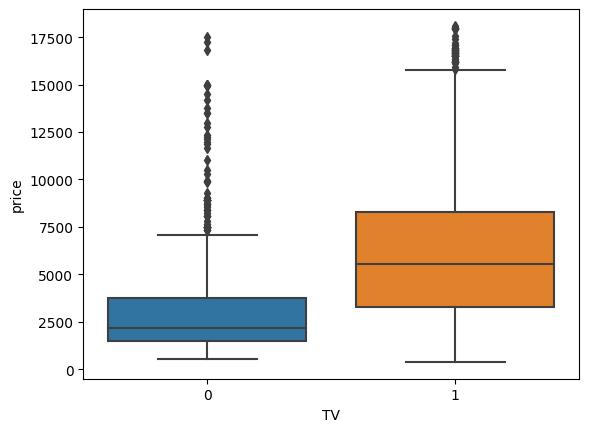

In [10]:
sns.boxplot(data = data, x = 'TV', y = 'price')

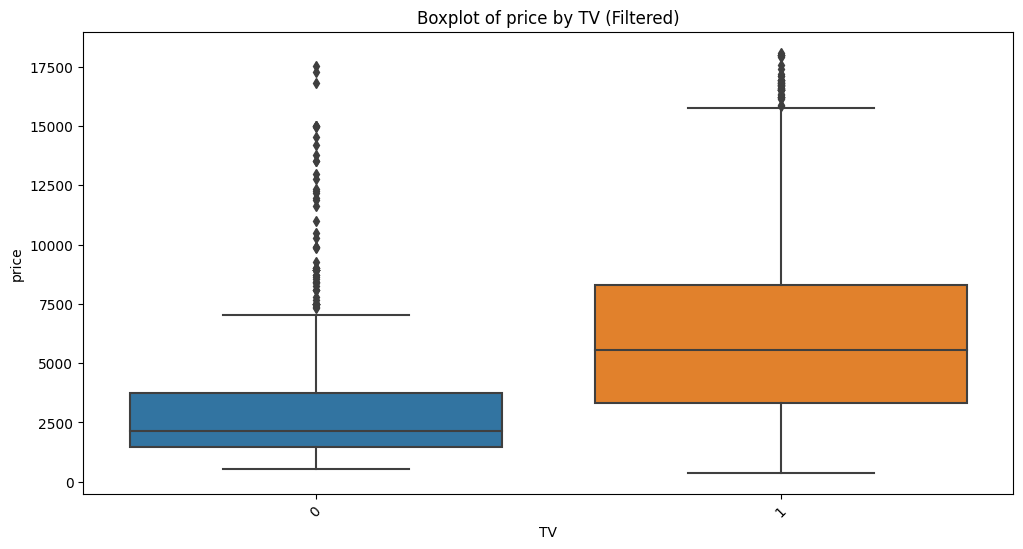

In [11]:
# 由于有price数据值过大的点的干扰，我们将其视为噪音进行清除，清除噪音后重新绘制箱线图

# 定义价格阈值
price_threshold = 20000

# 使用条件筛选出不超过阈值的数据
data_filtered = data[data['price'] <= price_threshold]

# 重新绘制箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='TV', y='price')
plt.title('Boxplot of price by TV (Filtered)')
plt.xticks(rotation=45)
plt.show()

neighbourhood与price_boxcox箱线图

<Axes: xlabel='neighbourhood_group_cleansed', ylabel='price'>

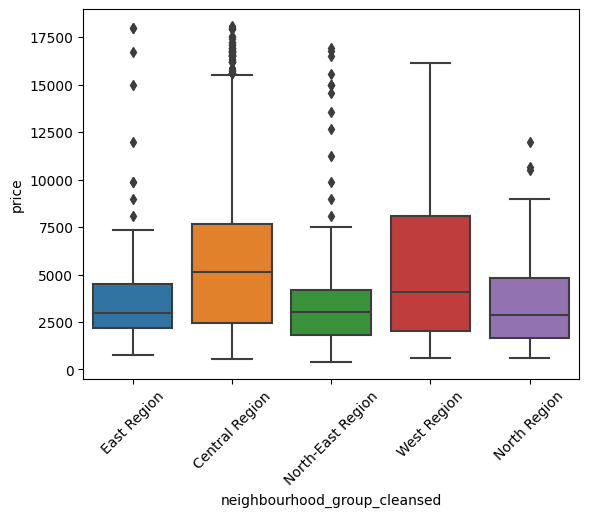

In [12]:
plt.xticks(rotation=45)  # 将标签旋转45度
sns.boxplot(data = data, x = 'neighbourhood_group_cleansed', y = 'price')

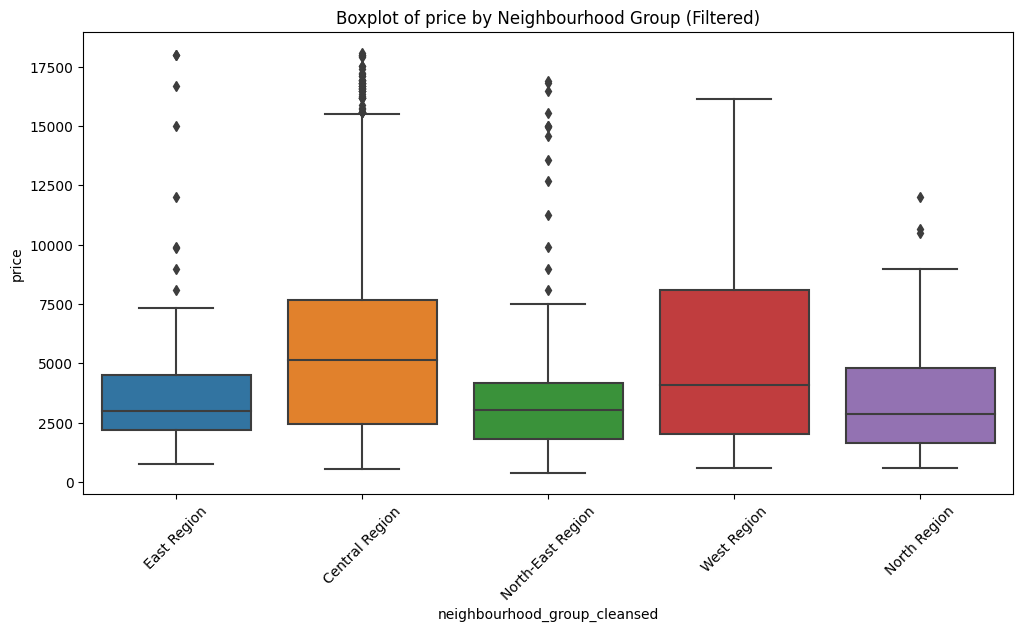

In [13]:
# 定义价格阈值
price_threshold = 20000

# 使用条件筛选出不超过阈值的数据
data_filtered = data[data['price'] <= price_threshold]

# 重新绘制箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='neighbourhood_group_cleansed', y='price')
plt.title('Boxplot of price by Neighbourhood Group (Filtered)')
plt.xticks(rotation=45)
plt.show()

room_type与price_boxcox的箱线图

<Axes: xlabel='room_type', ylabel='price'>

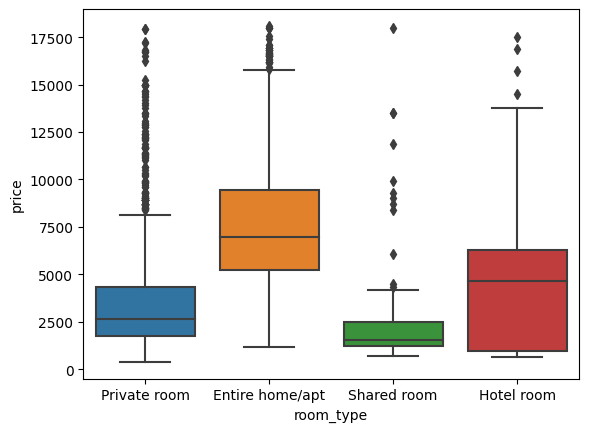

In [14]:
sns.boxplot(data = data, x = 'room_type', y = 'price')

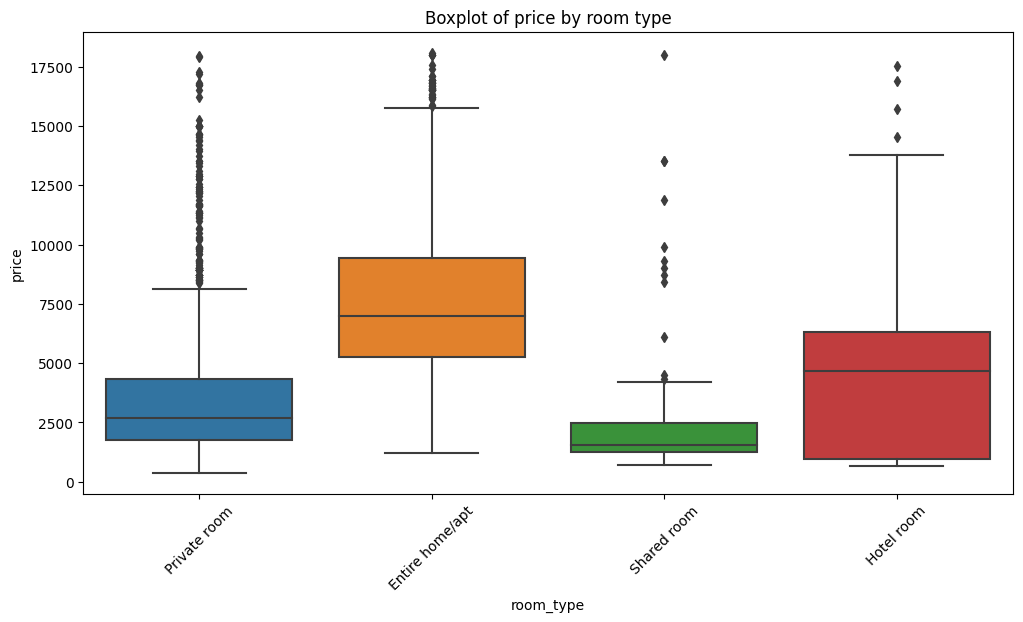

In [15]:
# 定义价格阈值
price_threshold = 20000

# 使用条件筛选出不超过阈值的数据
data_filtered = data[data['price'] <= price_threshold]

# 重新绘制箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='room_type', y='price')
plt.title('Boxplot of price by room type')
plt.xticks(rotation=45)
plt.show()

total_bedrooms 与price_boxcox的箱线图

<Axes: xlabel='total_bedrooms', ylabel='price'>

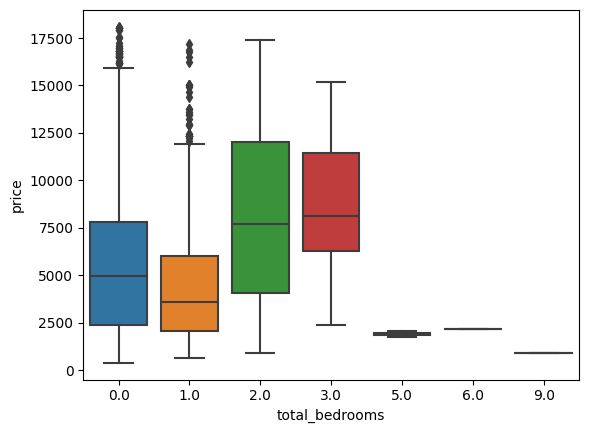

In [16]:
sns.boxplot(data = data, x = 'total_bedrooms', y = 'price')

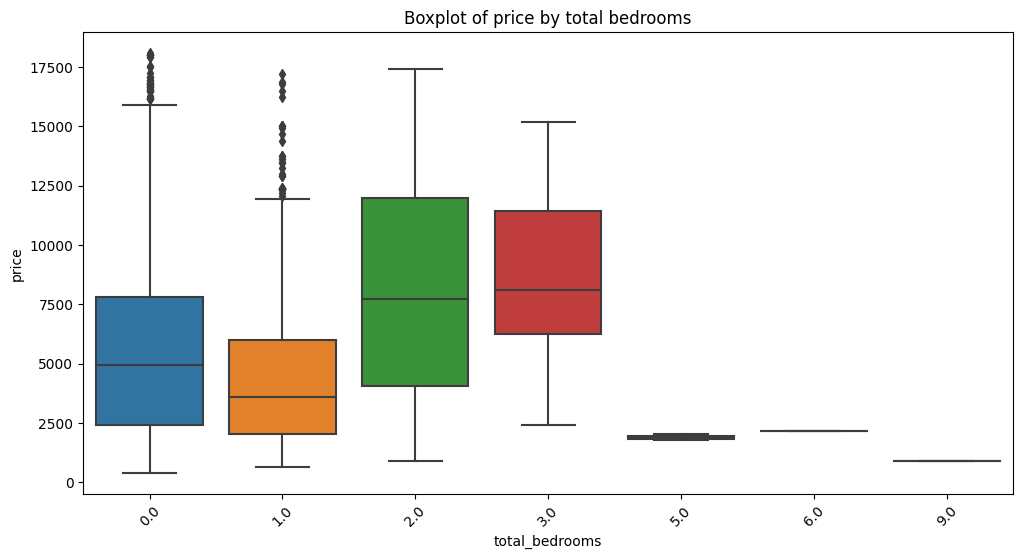

In [17]:
# 定义价格阈值
price_threshold = 20000

# 使用条件筛选出不超过阈值的数据
data_filtered = data[data['price'] <= price_threshold]

# 重新绘制箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='total_bedrooms', y='price')
plt.title('Boxplot of price by total bedrooms')
plt.xticks(rotation=45)
plt.show()

accommodates与price_boxcox的箱线图

<Axes: xlabel='accommodates', ylabel='price'>

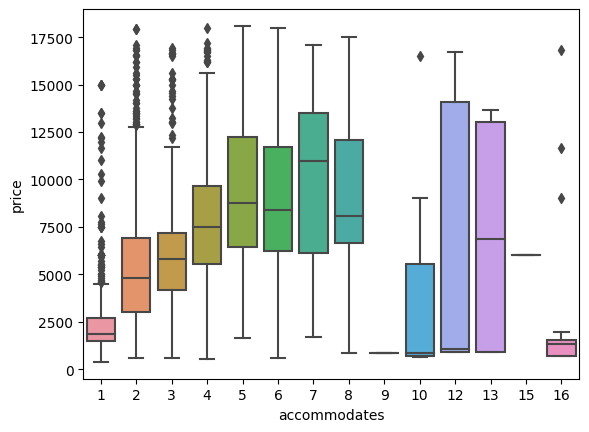

In [18]:
sns.boxplot(data = data, x = 'accommodates', y = 'price')

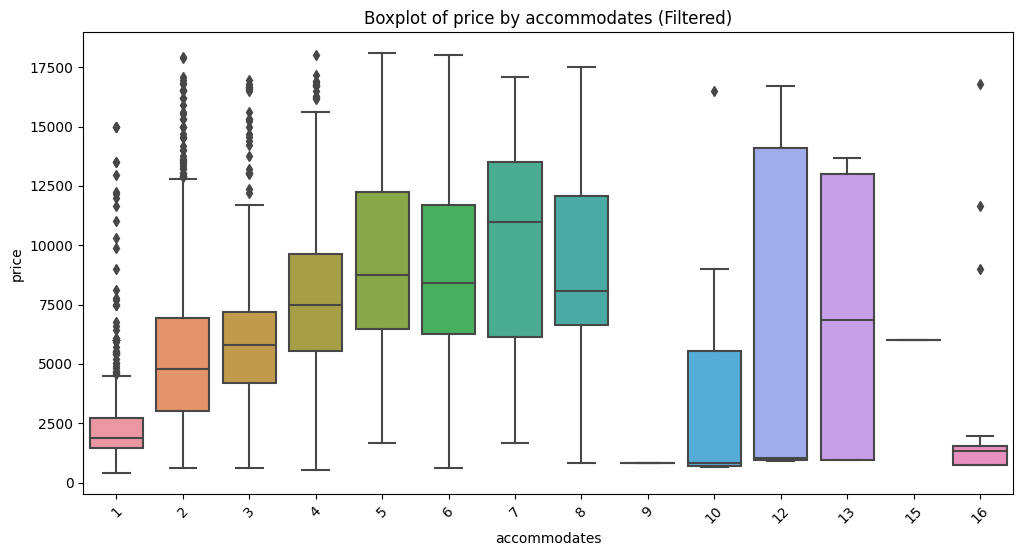

In [19]:
# 定义价格阈值
price_threshold = 20000

# 使用条件筛选出不超过阈值的数据
data_filtered = data[data['price'] <= price_threshold]

# 重新绘制箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered, x='accommodates', y='price')
plt.title('Boxplot of price by accommodates (Filtered)')
plt.xticks(rotation=45)
plt.show()

### 在不同价格范围内的房屋概率密度函数（price需满足正态分布）

<Axes: xlabel='price', ylabel='Density'>

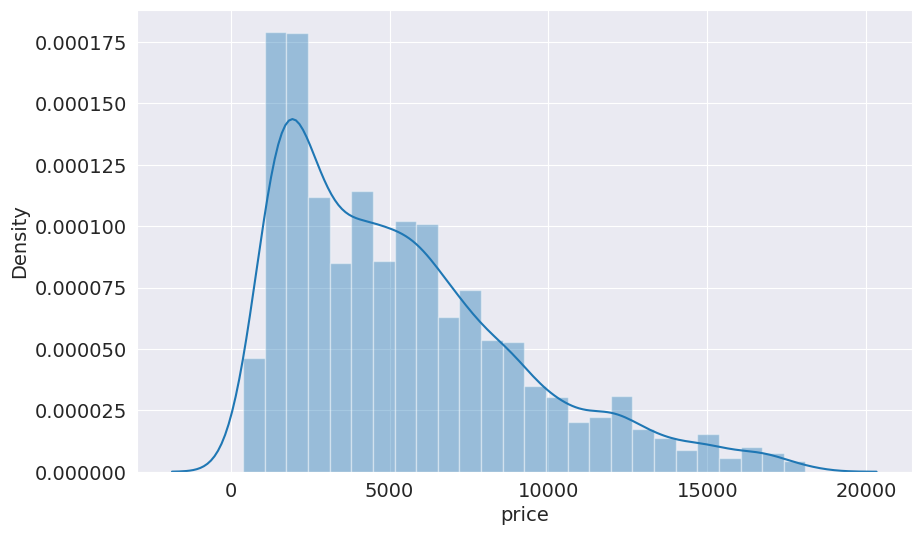

In [20]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.max_rows',150)

sns.distplot(data['price'])

In [21]:
print('Skewness : %f '% data['price'].skew())
print('Kurtosis : %f '% data['price'].kurt())

Skewness : 1.018556 
Kurtosis : 0.550641 


<Axes: xlabel='price_boxcox', ylabel='Density'>

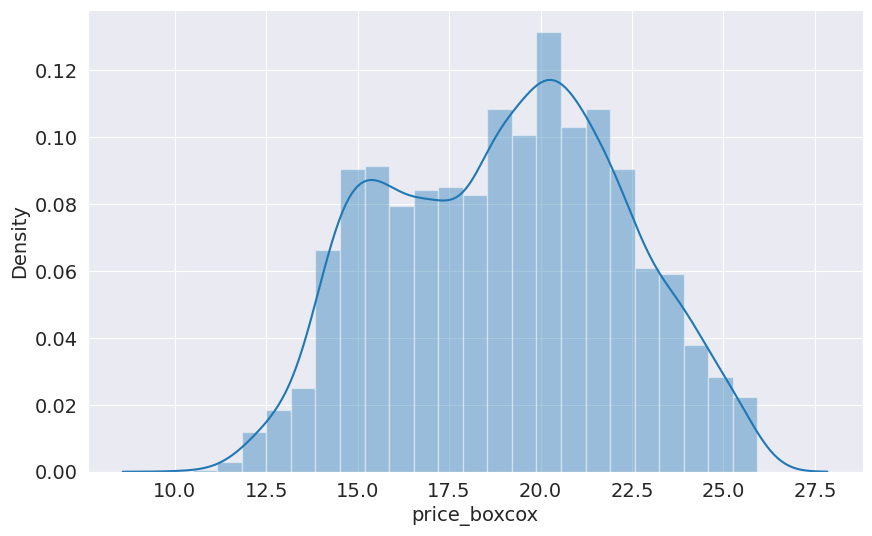

In [22]:
from scipy import stats

# 使用Box-Cox变换进行转换，lam为变换参数，通常为0
data['price_boxcox'], lambda_value = stats.boxcox(data['price'])
data.drop(["price"], axis=1, inplace=True)

sns.distplot(data['price_boxcox'])

In [23]:
print("Lambda (λ) Value:", lambda_value)

Lambda (λ) Value: 0.17422263043540667


In [24]:
# Review the skewness of each feature
data.skew().sort_values(ascending=False)

maximum_months           51.752515
total_beds                7.866875
total_baths               5.845741
minimum_months            5.713402
distance_to_mrt           4.680498
fan                       4.265506
closest_mall_distance     4.216277
accommodates              2.983854
total_bedrooms            2.300057
Backyard                  2.137168
BBQ                       2.019105
Pets                      1.976068
latitude                  1.800251
Oven                      1.296718
gym                       0.665879
stove                     0.475630
pool                      0.201878
Microwave                -0.007628
price_boxcox             -0.037368
refrigerator             -0.234228
longitude                -0.623770
TV                       -1.099504
kitchen                  -1.318388
dryer                    -1.555412
conditioning             -3.558763
Wifi                     -5.463659
dtype: float64

In [25]:
data

,neighbourhood_group_cleansed,latitude,longitude,room_type,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,conditioning,...,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths,bath_type,price_boxcox
0,East Region,1.345370,103.958870,Private room,3,37,0.496792,0.712034,3,1,...,0,0,0,0,0,2.0,3.0,1.0,private,18.784994
1,East Region,1.347540,103.959580,Private room,3,37,0.678619,0.771430,1,0,...,0,0,0,0,0,1.0,1.0,0.5,shared,16.022338
2,East Region,1.345310,103.961000,Private room,3,37,0.400694,0.930587,2,0,...,0,0,0,0,0,1.0,2.0,0.5,shared,16.582812
3,Central Region,1.290150,103.808140,Private room,3,33,0.580759,0.373537,1,1,...,0,0,0,1,0,1.0,1.0,2.0,shared,15.126926
4,Central Region,1.288360,103.811440,Private room,2,33,0.612490,0.482796,1,1,...,1,0,0,1,0,1.0,1.0,2.5,shared,15.967852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,Central Region,1.296851,103.829829,Private room,3,12,0.836969,0.426396,2,1,...,0,0,0,0,0,1.0,1.0,1.0,unknown,17.417556
3437,Central Region,1.310910,103.879490,Entire home/apt,0,12,0.623004,0.329886,13,1,...,0,0,0,1,0,3.0,3.0,2.0,unknown,24.424655
3438,Central Region,1.292341,103.837234,Private room,0,12,0.788851,0.469126,2,1,...,0,0,1,0,0,1.0,1.0,1.0,unknown,21.425786
3439,Central Region,1.303162,103.900534,Private room,3,12,1.441732,0.108850,1,1,...,0,0,0,0,0,1.0,1.0,1.5,unknown,17.253443


### 输出price与其他输入特征的皮尔森相关性



使用皮尔逊相关系数（Pearson Correlation Coefficient），提取了'price'列与其他列的相关性值。对'price'与其他列的相关性进行排序.

In [26]:
# cor_df = pd.DataFrame(sale_corr.sort_values(ascending = False))
corr_df  = data.corr()
sale_corr = corr_df['price_boxcox']
sale_corr.sort_values(ascending = False)
# cor_df = pd.DataFrame(sale_corr.sort_values(ascending = False))

price_boxcox             1.000000
TV                       0.417818
gym                      0.353178
accommodates             0.262419
BBQ                      0.259538
pool                     0.249434
Pets                     0.240814
Backyard                 0.155208
Microwave                0.148169
dryer                    0.121808
refrigerator             0.121781
kitchen                  0.117190
conditioning             0.064774
distance_to_mrt          0.063072
stove                    0.050764
Wifi                     0.023272
total_bedrooms          -0.013433
maximum_months          -0.026485
closest_mall_distance   -0.036216
total_beds              -0.049142
fan                     -0.054288
Oven                    -0.087118
longitude               -0.089935
total_baths             -0.196132
latitude                -0.234801
minimum_months          -0.328762
Name: price_boxcox, dtype: float64

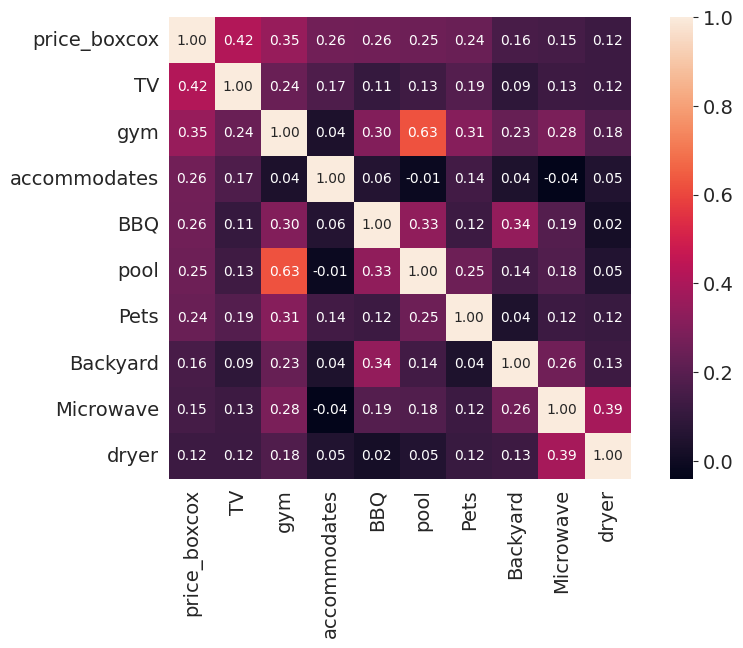

In [27]:
k = 10 #number of variables for heatmap
cols = data.corr().nlargest(k, 'price_boxcox')['price_boxcox'].index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm,cbar = True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

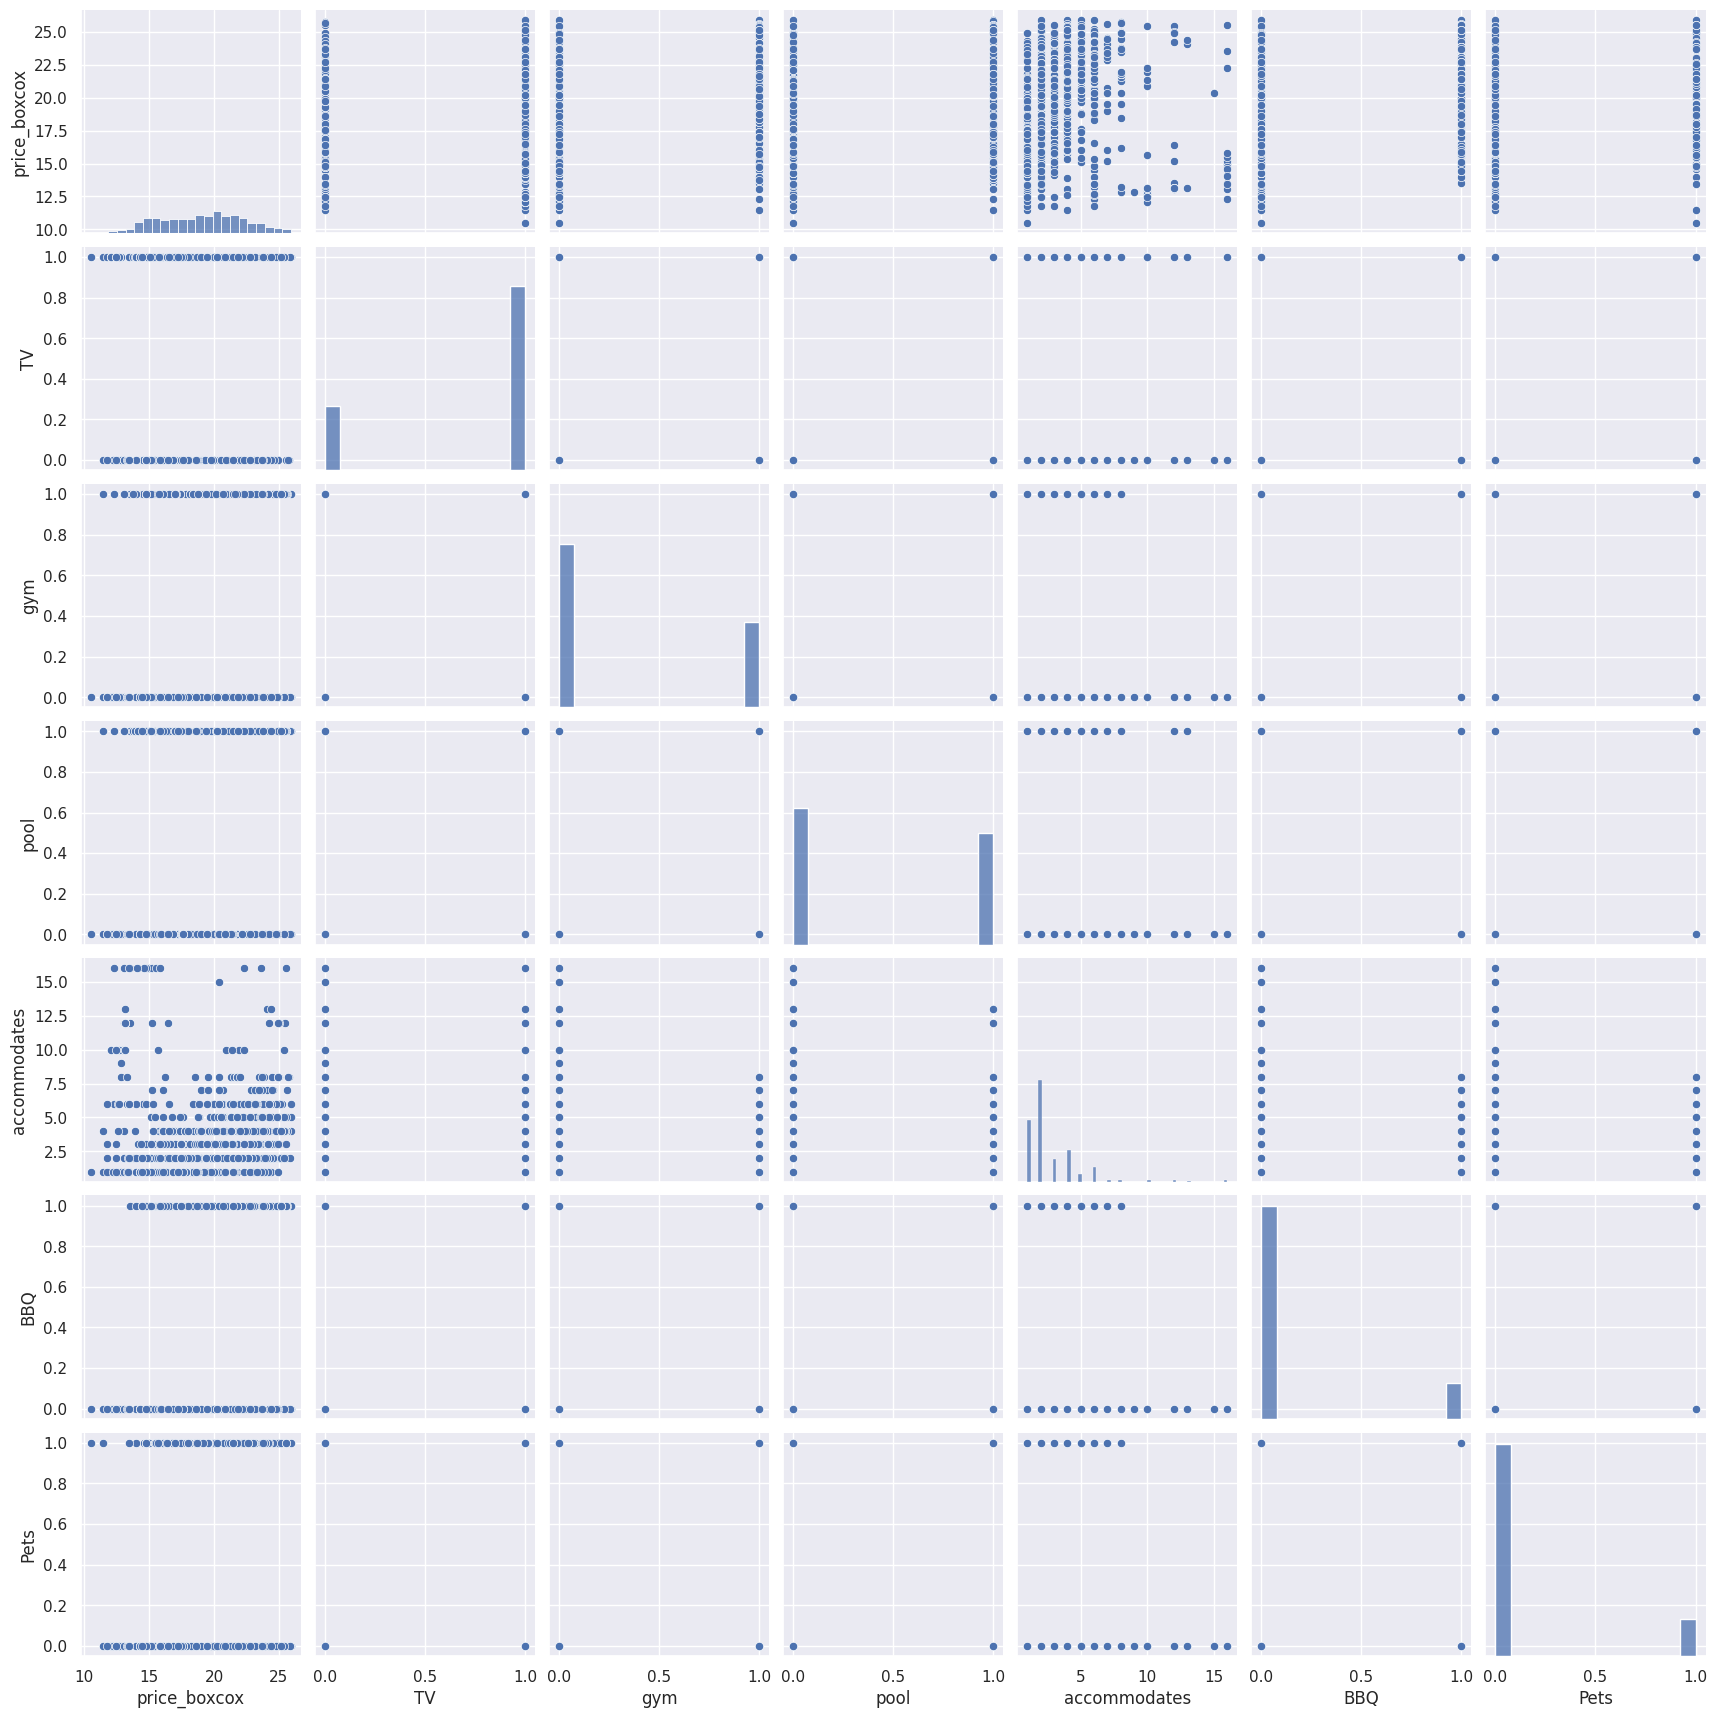

In [28]:
sns.set()
cols = ['price_boxcox', 'TV', 'gym', 'pool', 'accommodates', 'BBQ', 'Pets']
sns.pairplot(data[cols], height = 2.5)
plt.show()

## Identify Input and Output

In [29]:
# Identify the input columns (a list of column names)
input_cols = list(data.drop(["price_boxcox"],axis=1).columns)

# Identify the name of the target column (a single string, not a list)
target_col = 'price_boxcox'

In [30]:
inputs_df = data[input_cols].copy()
targets = data[target_col]

In [31]:
inputs_df

,neighbourhood_group_cleansed,latitude,longitude,room_type,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,conditioning,...,refrigerator,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths,bath_type
0,East Region,1.345370,103.958870,Private room,3,37,0.496792,0.712034,3,1,...,1,0,0,0,0,0,2.0,3.0,1.0,private
1,East Region,1.347540,103.959580,Private room,3,37,0.678619,0.771430,1,0,...,1,0,0,0,0,0,1.0,1.0,0.5,shared
2,East Region,1.345310,103.961000,Private room,3,37,0.400694,0.930587,2,0,...,0,0,0,0,0,0,1.0,2.0,0.5,shared
3,Central Region,1.290150,103.808140,Private room,3,33,0.580759,0.373537,1,1,...,1,0,0,0,1,0,1.0,1.0,2.0,shared
4,Central Region,1.288360,103.811440,Private room,2,33,0.612490,0.482796,1,1,...,1,1,0,0,1,0,1.0,1.0,2.5,shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,Central Region,1.296851,103.829829,Private room,3,12,0.836969,0.426396,2,1,...,0,0,0,0,0,0,1.0,1.0,1.0,unknown
3437,Central Region,1.310910,103.879490,Entire home/apt,0,12,0.623004,0.329886,13,1,...,1,0,0,0,1,0,3.0,3.0,2.0,unknown
3438,Central Region,1.292341,103.837234,Private room,0,12,0.788851,0.469126,2,1,...,1,0,0,1,0,0,1.0,1.0,1.0,unknown
3439,Central Region,1.303162,103.900534,Private room,3,12,1.441732,0.108850,1,1,...,0,0,0,0,0,0,1.0,1.0,1.5,unknown


In [32]:
targets

0       18.784994
1       16.022338
2       16.582812
3       15.126926
4       15.967852
          ...    
3436    17.417556
3437    24.424655
3438    21.425786
3439    17.253443
3440    21.810223
Name: price_boxcox, Length: 3148, dtype: float64

## Fill in missing values

### Identify Numerical value and Text value

In [33]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(len(list(numeric_cols)))

25


In [34]:
numeric_cols

['latitude',
 'longitude',
 'minimum_months',
 'maximum_months',
 'distance_to_mrt',
 'closest_mall_distance',
 'accommodates',
 'conditioning',
 'BBQ',
 'gym',
 'pool',
 'dryer',
 'Wifi',
 'kitchen',
 'Backyard',
 'TV',
 'refrigerator',
 'Microwave',
 'Oven',
 'Pets',
 'stove',
 'fan',
 'total_bedrooms',
 'total_beds',
 'total_baths']

In [35]:
text_cols = inputs_df.select_dtypes('object').columns.tolist()

print(len(list(text_cols)))

3


In [36]:
text_cols

['neighbourhood_group_cleansed', 'room_type', 'bath_type']

### For missing value in Numerical Data

查看每个feature的缺失值,并删除高缺失率的feature：

In [37]:
# Find columns with missing values and their percent missing
data[numeric_cols].isnull().sum()
miss_val = data[numeric_cols].isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=data[numeric_cols].isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/data.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent


We'll remove those features with a high percent of missing values such as review_scores_accuracy, review_scores_value, review_scores_location, review_scores_checkin, review_scores_cleanliness	, review_scores_communication and review_scores_rating. Note that the beds has only 16% missing. This is relatively low so we can choose to replace the NaN values with the imputed mean of the column.

In [38]:
# # drop columns with high missing values
# data = data.drop(['review_scores_accuracy','review_scores_value','review_scores_location','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_rating'], axis=1)

In [39]:
# from sklearn.impute import KNNImputer

# # 使用均值来填充缺失值
# # mean = np.nanmean(data, axis=0)

# # 用KNN来填充缺失值
# imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)

# data_beds = data[["beds"]]
# data_beds = imputer.fit_transform(data_beds)
# data["beds"] = data_beds

# # # 将 NumPy 数组转换为 Pandas DataFrame
# # data = pd.DataFrame(data, columns=features)

### For missing value in Text Data

In [40]:
# # Find columns with missing values and their percent missing
# data[text_cols].isnull().sum()
# miss_val = data[text_cols].isnull().sum().sort_values(ascending=False)
# miss_val = pd.DataFrame(data=data[text_cols].isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# # Add a new column to the dataframe and fill it with the percentage of missing values
# miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/data.shape[0] * 100))
# miss_val = miss_val[miss_val.MissvalCount > 0]
# miss_val

Note that the bathrooms_text has only 0.23% missing. This is extremly low so we will remove the rows with missing values.

In [41]:
# # drop rows with any missing values
# data = data.dropna(subset=['bathrooms_text'])

### Check data

In [42]:
inputs_df

,neighbourhood_group_cleansed,latitude,longitude,room_type,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,conditioning,...,refrigerator,Microwave,Oven,Pets,stove,fan,total_bedrooms,total_beds,total_baths,bath_type
0,East Region,1.345370,103.958870,Private room,3,37,0.496792,0.712034,3,1,...,1,0,0,0,0,0,2.0,3.0,1.0,private
1,East Region,1.347540,103.959580,Private room,3,37,0.678619,0.771430,1,0,...,1,0,0,0,0,0,1.0,1.0,0.5,shared
2,East Region,1.345310,103.961000,Private room,3,37,0.400694,0.930587,2,0,...,0,0,0,0,0,0,1.0,2.0,0.5,shared
3,Central Region,1.290150,103.808140,Private room,3,33,0.580759,0.373537,1,1,...,1,0,0,0,1,0,1.0,1.0,2.0,shared
4,Central Region,1.288360,103.811440,Private room,2,33,0.612490,0.482796,1,1,...,1,1,0,0,1,0,1.0,1.0,2.5,shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,Central Region,1.296851,103.829829,Private room,3,12,0.836969,0.426396,2,1,...,0,0,0,0,0,0,1.0,1.0,1.0,unknown
3437,Central Region,1.310910,103.879490,Entire home/apt,0,12,0.623004,0.329886,13,1,...,1,0,0,0,1,0,3.0,3.0,2.0,unknown
3438,Central Region,1.292341,103.837234,Private room,0,12,0.788851,0.469126,2,1,...,1,0,0,1,0,0,1.0,1.0,1.0,unknown
3439,Central Region,1.303162,103.900534,Private room,3,12,1.441732,0.108850,1,1,...,0,0,0,0,0,0,1.0,1.0,1.5,unknown


In [43]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3148 entries, 0 to 3440
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3148 non-null   object 
 1   latitude                      3148 non-null   float64
 2   longitude                     3148 non-null   float64
 3   room_type                     3148 non-null   object 
 4   minimum_months                3148 non-null   int64  
 5   maximum_months                3148 non-null   int64  
 6   distance_to_mrt               3148 non-null   float64
 7   closest_mall_distance         3148 non-null   float64
 8   accommodates                  3148 non-null   int64  
 9   conditioning                  3148 non-null   int64  
 10  BBQ                           3148 non-null   int64  
 11  gym                           3148 non-null   int64  
 12  pool                          3148 non-null   int64  
 13  dry

## One-Hot编码

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[text_cols])
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(text_cols))

inputs_df[encoded_cols] = pd.get_dummies(inputs_df[text_cols])
inputs_df = inputs_df.drop(text_cols, axis=1)

In [46]:
input_cols = list(inputs_df.columns)

In [47]:
inputs_df

,latitude,longitude,minimum_months,maximum_months,distance_to_mrt,closest_mall_distance,accommodates,conditioning,BBQ,gym,...,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_none,bath_type_private,bath_type_shared,bath_type_unknown
0,1.345370,103.958870,3,37,0.496792,0.712034,3,1,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1.347540,103.959580,3,37,0.678619,0.771430,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1.345310,103.961000,3,37,0.400694,0.930587,2,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1.290150,103.808140,3,33,0.580759,0.373537,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1.288360,103.811440,2,33,0.612490,0.482796,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,1.296851,103.829829,3,12,0.836969,0.426396,2,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3437,1.310910,103.879490,0,12,0.623004,0.329886,13,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3438,1.292341,103.837234,0,12,0.788851,0.469126,2,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3439,1.303162,103.900534,3,12,1.441732,0.108850,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
inputs_df[encoded_cols]

,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_none,bath_type_private,bath_type_shared,bath_type_unknown
0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,1,0,0,0,0,0,0,1,0,0,0,0,1
3437,1,0,0,0,0,1,0,0,0,0,0,0,1
3438,1,0,0,0,0,0,0,1,0,0,0,0,1
3439,1,0,0,0,0,0,0,1,0,0,0,0,1


In [49]:
print(encoded_cols)

['neighbourhood_group_cleansed_Central Region', 'neighbourhood_group_cleansed_East Region', 'neighbourhood_group_cleansed_North Region', 'neighbourhood_group_cleansed_North-East Region', 'neighbourhood_group_cleansed_West Region', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'bath_type_none', 'bath_type_private', 'bath_type_shared', 'bath_type_unknown']


In [50]:
inputs_df.shape

(3148, 38)

In [51]:
features = list(inputs_df)

# Train-Test Split dataset

In [52]:
# set the target and predictors
y = targets  # target

# use only those input features with numeric data type
X = inputs_df  # predictors

In [53]:
# split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [54]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [55]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

## Linear Regression




### Modeling

In [56]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate

In [57]:
y_lr_pred = lr.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_lr_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.08128788564618328


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_lr_pred)
mae = mean_absolute_error(y_test, y_lr_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 3.6551629994093466
平均绝对误差MAE: 1.4711922089059228


In [59]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_lr_pred)
print("R2 Score:", r2)

R2 Score: 0.6324325994550536


Text(0, 0.5, 'True Values')

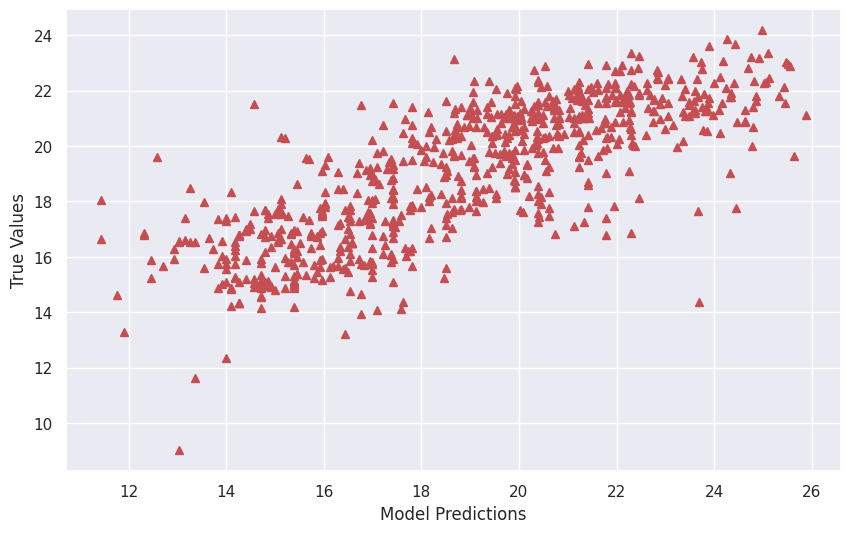

In [60]:
plt.plot(y_test, y_lr_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

 linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s).

 R2 is -3.302656377246863e+16. It shows that the performance of the model is very poor, much lower than that of a random model. This may be due to the poor performance of the model on the training set, and there are obvious overfitting problems.

### Make Prediction

In [61]:
def lr_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return lr.predict(X_input)[0]

In [62]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [63]:
lr_predicted_price_boxcox = lr_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(lr_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (lr_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(lr_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $6918941599165.203
The predicted sale price of the house is $2.2036360734025555e+69


## Ridge Regression
However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly.

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better

### Modeling

In [64]:
from sklearn.linear_model import Ridge
# Create the model
rr = Ridge()
# Fit the model using inputs and targets
rr.fit(X_train, y_train)

Ridge()

### Evaluate

In [65]:
y_rr_pred = rr.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_rr_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.08130242434954957


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_rr_pred)
mae = mean_absolute_error(y_test, y_rr_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 3.6553375756626854
平均绝对误差MAE: 1.4714585373293818


In [67]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_rr_pred)
print("R2 Score:", r2)

R2 Score: 0.6324150438659739


Text(0, 0.5, 'True Values')

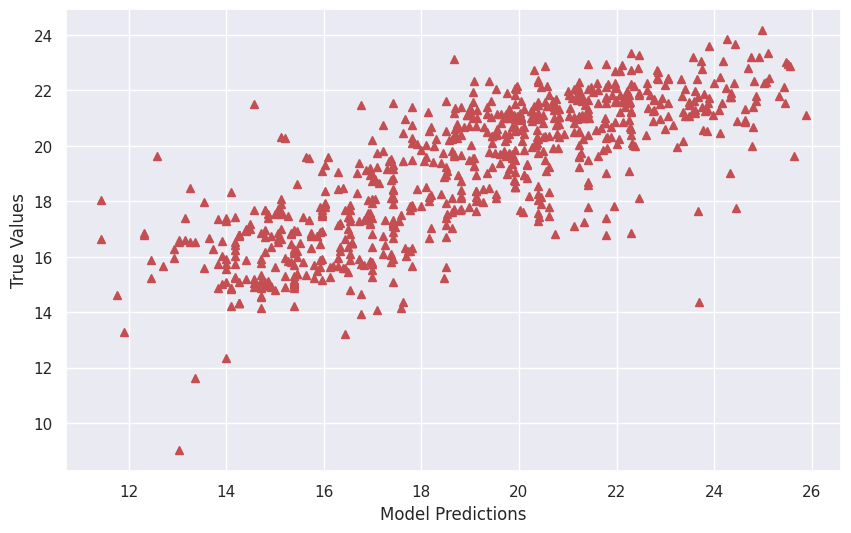

In [68]:
plt.plot(y_test, y_rr_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [69]:
from sklearn.linear_model import LinearRegression

weights = rr.coef_
weights

array([-0.4311303 , -0.21795915, -0.66979716, -0.03176905,  0.21574061,
       -0.17616457,  0.84882484,  0.00875216,  0.28532657,  0.42481559,
        0.221904  ,  0.11926401, -0.03376707, -0.40574498,  0.07775145,
        0.2749214 , -0.21590407,  0.07608803, -0.0306845 ,  0.0332176 ,
       -0.24476247, -0.05798578, -0.03225746, -0.61533979, -0.17069399,
       -0.01232596,  0.03255859,  0.10067511,  0.13121106, -0.15913517,
        0.81492928, -0.34245828, -0.50072966, -0.45748945,  0.06886959,
        0.36416913, -0.28331149, -0.05614567])

In [70]:
weights_df = pd.DataFrame({
    'Feature': input_cols,
    'weight': weights}).sort_values('weight', ascending=False)

weights_df

,Feature,weight
6,accommodates,0.848825
30,room_type_Entire home/apt,0.814929
9,gym,0.424816
35,bath_type_private,0.364169
8,BBQ,0.285327
15,TV,0.274921
10,pool,0.221904
4,distance_to_mrt,0.215741
28,neighbourhood_group_cleansed_North-East Region,0.131211
11,dryer,0.119264


In [71]:
importance = weights

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['accommodates', 'room_type_Entire home/apt', 'gym', 'bath_type_private', 'BBQ', 'TV', 'pool', 'distance_to_mrt', 'neighbourhood_group_cleansed_North-East Region', 'dryer', 'neighbourhood_group_cleansed_North Region', 'Backyard', 'Microwave', 'bath_type_none', 'Pets']


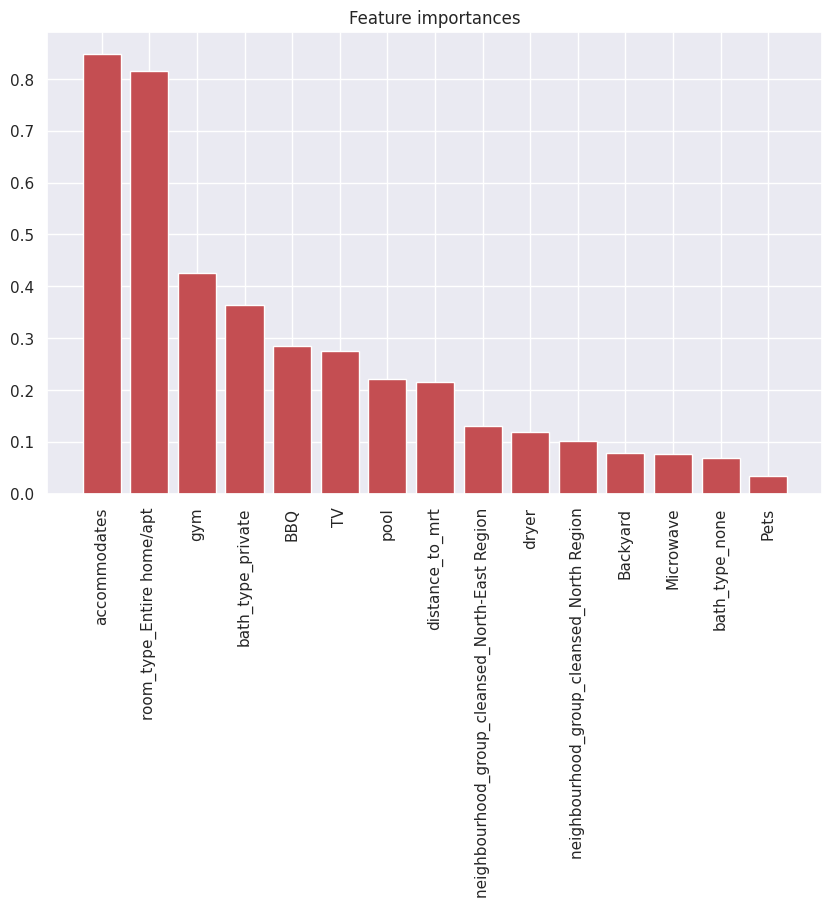

In [72]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [73]:
def rr_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return rr.predict(X_input)[0]

In [74]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [75]:
rr_predicted_price_boxcox = rr_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(rr_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (rr_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(rr_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $18.87111481077368
The predicted sale price of the house is $4254.751816046881


## Random Forest

### Modeling

In [76]:
rfr = RandomForestRegressor(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=3,
    n_estimators=300,
    random_state= 42
)
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=300, random_state=42)

使用了 GridSearchCV 来进行参数网格搜索，进行。超参数调优，以寻找最佳的 LightGBM 模型参数配置（跑的时间太久了）

In [77]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_leaf': [3, 5, 7],
#     'max_features': ['auto', 'sqrt']
# }


# gs_knn = GridSearchCV(rfr,
#                       param_grid=params,
#                       cv=5)

# gs_knn.fit(X_train, y_train)
# gs_knn.score(X_train, y_train)

# pred_y_train = rfr.predict(X_train)
# pred_y_test = rfr.predict(X_test)

# r2_train = metrics.r2_score(y_train, pred_y_train)
# r2_test = metrics.r2_score(y_test, pred_y_test)

# msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
# msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

# print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
# print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

# gs_knn.best_params_


# 结果：
# Train r2 = 0.97
# Test r2 = 0.79
# Train msle = 0.00
# Test msle = 0.01
# {'max_depth': 15,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 3,
#  'n_estimators': 300}

### Evaluate

In [78]:
y_rfr_pred = rfr.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_rfr_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05899019852443493


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_rfr_pred)
mae = mean_absolute_error(y_test, y_rfr_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 2.1189001392659375
平均绝对误差MAE: 1.0603280285179553


In [80]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_rfr_pred)
print("R2 Score:", r2)

R2 Score: 0.7869209618476217


Text(0, 0.5, 'True Values')

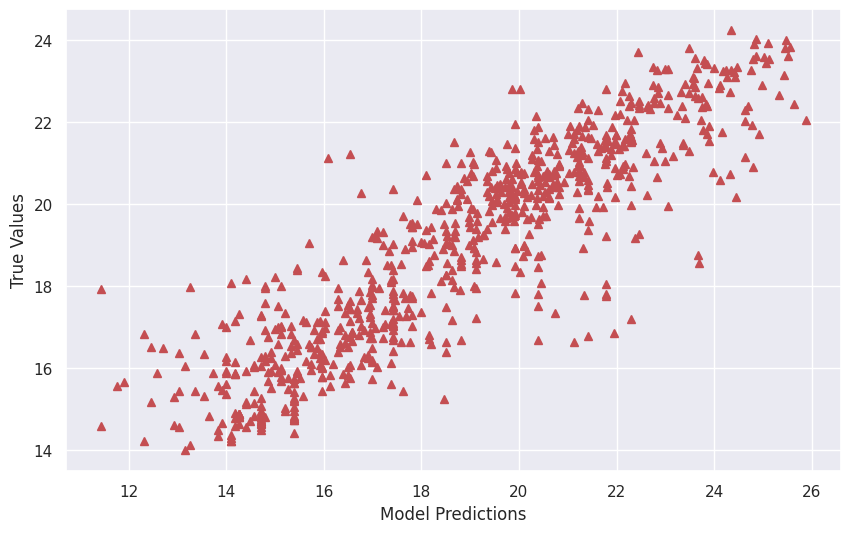

In [81]:
plt.plot(y_test, y_rfr_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [82]:
# Random forest determined feature importances
rfr.feature_importances_

array([0.05952088, 0.04256054, 0.08805457, 0.01374596, 0.03189571,
       0.0320007 , 0.11668704, 0.0018829 , 0.01304306, 0.02530344,
       0.02034377, 0.00536108, 0.00157628, 0.01204482, 0.00379089,
       0.03599835, 0.00631249, 0.0075232 , 0.01128316, 0.00595147,
       0.00758386, 0.00160585, 0.01007835, 0.0420695 , 0.04083838,
       0.00650643, 0.00166307, 0.00071989, 0.00105568, 0.0017722 ,
       0.12975534, 0.00902226, 0.06242832, 0.01187131, 0.00118397,
       0.01346525, 0.06936574, 0.05413431])

In [83]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['room_type_Entire home/apt', 'accommodates', 'minimum_months', 'bath_type_shared', 'room_type_Private room', 'latitude', 'bath_type_unknown', 'longitude', 'total_beds', 'total_baths', 'TV', 'closest_mall_distance', 'distance_to_mrt', 'gym', 'pool']


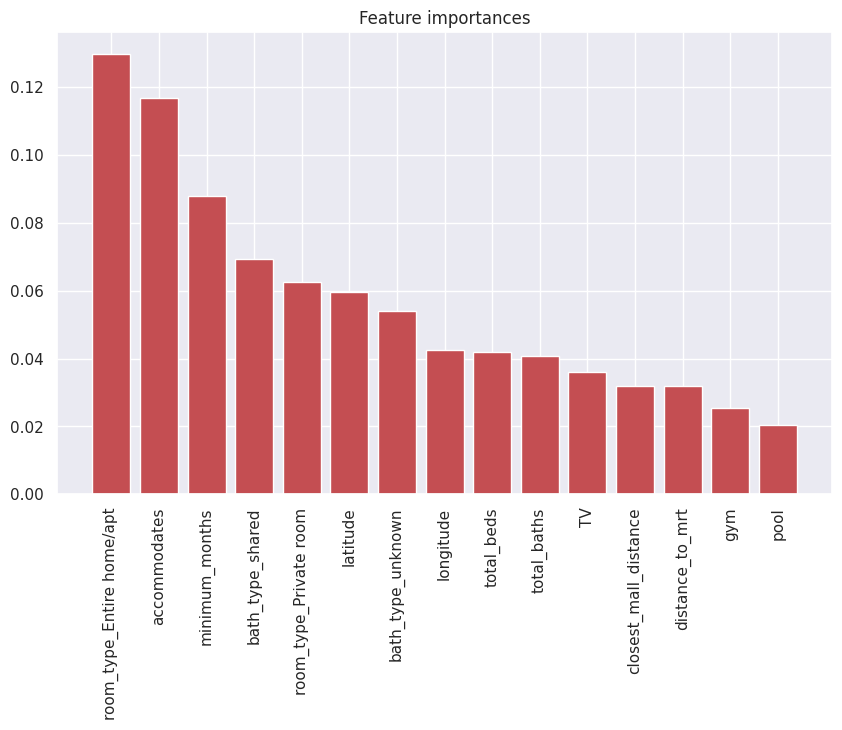

In [84]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [85]:
def rfr_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return rfr.predict(X_input)[0]

In [86]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [87]:
rfr_predicted_price_boxcox = rfr_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(rfr_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (rfr_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(rfr_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $18.38257010630646
The predicted sale price of the house is $3792.2191737389185


## Neural Network

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline

### Modeling

In [89]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [90]:
model =Sequential()

In [91]:
model.add(Dense(50, input_dim=38, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1950      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [93]:
model.compile(optimizer='Adam', loss='mse')

In [94]:
epochs_hist =model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.2)

Epoch 1/1000
19/19 [==============================] - 1s 15ms/step - loss: 316.8650 - val_loss: 251.3376
Epoch 2/1000
19/19 [==============================] - 0s 5ms/step - loss: 161.5679 - val_loss: 59.4367
Epoch 3/1000
19/19 [==============================] - 0s 5ms/step - loss: 59.7391 - val_loss: 19.9738
Epoch 4/1000
19/19 [==============================] - 0s 4ms/step - loss: 38.5838 - val_loss: 17.2863
Epoch 5/1000
19/19 [==============================] - 0s 4ms/step - loss: 34.0206 - val_loss: 13.7826
Epoch 6/1000
19/19 [==============================] - 0s 5ms/step - loss: 33.6433 - val_loss: 13.5146
Epoch 7/1000
19/19 [==============================] - 0s 4ms/step - loss: 30.0690 - val_loss: 13.1300
Epoch 8/1000
19/19 [==============================] - 0s 4ms/step - loss: 28.9970 - val_loss: 11.3625
Epoch 9/1000
19/19 [==============================] - 0s 4ms/step - loss: 26.0703 - val_loss: 12.1595
Epoch 10/1000
19/19 [==============================] - 0s 4ms/step - loss: 25.

In [95]:
# param_grid = {
#     'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'max_iter': [100, 200, 300],
#     'solver': ['adam', 'sgd', 'lbfgs'],
#     'batch_size': [32, 64, 128],
#     'momentum': [0.9, 0.99],
#     'early_stopping': [True, False],
#     'nesterovs_momentum': [True, False],
# }


### Evaluate

In [96]:
y_NN_pred = model.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_NN_pred))

25/25 [==============================] - 0s 3ms/step
平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.07073641059295738


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_NN_pred)
mae = mean_absolute_error(y_test, y_NN_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 3.2178442958241398
平均绝对误差MAE: 1.2982096955000941


In [98]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_NN_pred)
print("R2 Score:", r2)

R2 Score: 0.6764098719084232


In [99]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

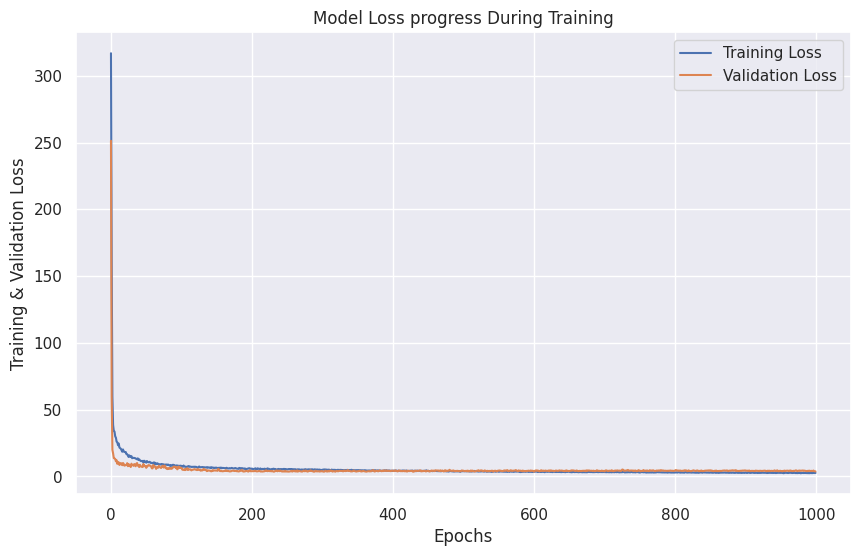

In [100]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training & Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

Text(0, 0.5, 'True Values')

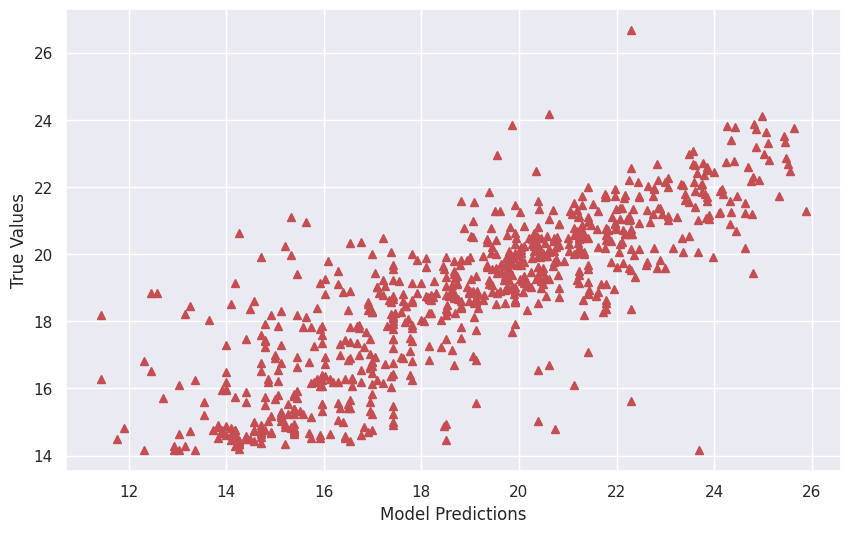

In [101]:
plt.plot(y_test, y_NN_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Make Prediction

In [102]:
def NN_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return model.predict(X_input)[0]

In [103]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [104]:
NN_predicted_price_boxcox = NN_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(NN_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (NN_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(NN_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

1/1 [==============================] - 0s 34ms/step
The predicted result of the model is $[18.188862]
The predicted sale price of the house is $[3620.722]


## SVM

### Modeling

In [105]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

svm = svm.SVR(C=10, gamma='auto', kernel='rbf')

svm.fit(X_train,y_train)

SVR(C=10, gamma='auto')

使用了 GridSearchCV 来进行参数网格搜索，进行。超参数调优，以寻找最佳的 LightGBM 模型参数配置（跑的时间太久了）

In [106]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'C': [0.1, 1, 10],  # 正则化参数
#     'kernel': ['linear', 'rbf', 'poly'],  # 核函数类型
#     'gamma': ['scale', 'auto', 0.1, 1],  # gamma 参数（对于非线性核）
# }

# gs_knn = GridSearchCV(svm,
#                       param_grid=params,
#                       cv=5)

# gs_knn.fit(X_train, y_train)
# gs_knn.score(X_train, y_train)

# pred_y_train = svm.predict(X_train)
# pred_y_test = svm.predict(X_test)

# r2_train = metrics.r2_score(y_train, pred_y_train)
# r2_test = metrics.r2_score(y_test, pred_y_test)

# msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
# msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

# print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
# print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

# gs_knn.best_params_


# 结果：
# Train r2 = 0.77
# Test r2 = 0.75
# Train msle = 0.01
# Test msle = 0.01
# {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

### Evaluate

In [107]:
y_svm_pred = svm.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_svm_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05745496931750218


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_svm_pred)
mae = mean_absolute_error(y_test, y_svm_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 2.333058232697696
平均绝对误差MAE: 1.0503616898630963


In [109]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_svm_pred)
print("R2 Score:", r2)

R2 Score: 0.7653849773454002


Text(0, 0.5, 'True Values')

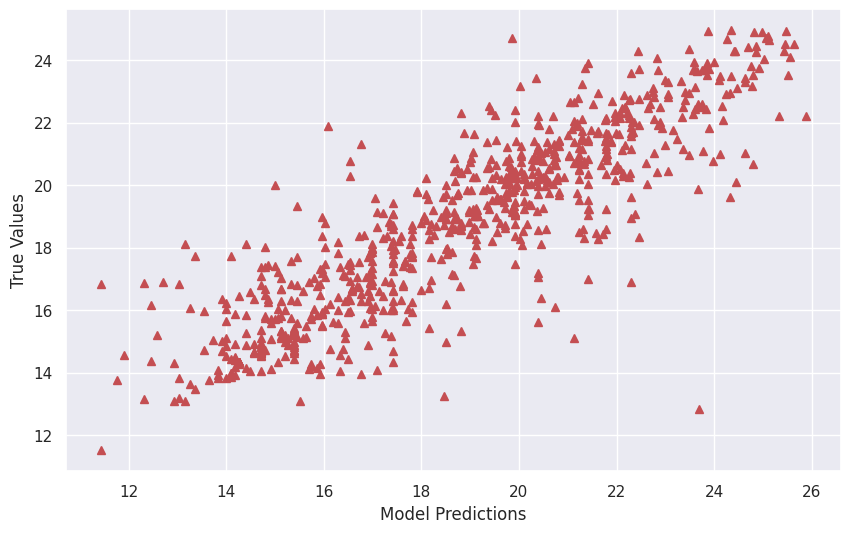

In [110]:
plt.plot(y_test, y_svm_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Make Prediction

In [111]:
def svm_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return svm.predict(X_input)[0]

In [112]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [113]:
svm_predicted_price_boxcox = svm_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(svm_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (svm_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(svm_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $18.131673603748244
The predicted sale price of the house is $3571.3343312325105


## XGBoosting

### Modeling

In [114]:
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

# 定义超参数
params = {
    'base_score': 1,
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'n_estimators': 100,
    'random_state': 42
}

# 初始化XGBoost回归器并传递超参数
XGB = XGBRegressor(**params)

# 使用fit方法拟合模型
XGB.fit(X_train, y_train)


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

使用了 GridSearchCV 来进行参数网格搜索，进行。超参数调优，以寻找最佳的 LightGBM 模型参数配置（跑的时间太久了）

In [115]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'booster' : ['gbtree','gblinear'],
#     'base_score' : [0.25,0.5,0.75,1],
#     'min_child_weight' : [1,2,3,4],
#     'n_estimators' : [100, 500, 900, 1100, 1500],
#     'max_depth' : [4, 6, 8],
#     'learning_rate' : [0.2, 0.15, 0.1, 0.01, 0.001],
# }

# gs_knn = GridSearchCV(XGB,
#                       param_grid=params,
#                       cv=5)

# gs_knn.fit(X_train, y_train)
# gs_knn.score(X_train, y_train)

# pred_y_train = XGB.predict(X_train)
# pred_y_test = XGB.predict(X_test)

# r2_train = metrics.r2_score(y_train, pred_y_train)
# r2_test = metrics.r2_score(y_test, pred_y_test)

# msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
# msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

# print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
# print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

# gs_knn.best_params_

### Evaluate

In [116]:
y_XGB_pred = XGB.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_XGB_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05616977842631535


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_XGB_pred)
mae = mean_absolute_error(y_test, y_XGB_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 2.0344287538639105
平均绝对误差MAE: 1.02093700645266


In [118]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_XGB_pred)
print("R2 Score:", r2)

R2 Score: 0.7954155016417899


Text(0, 0.5, 'True Values')

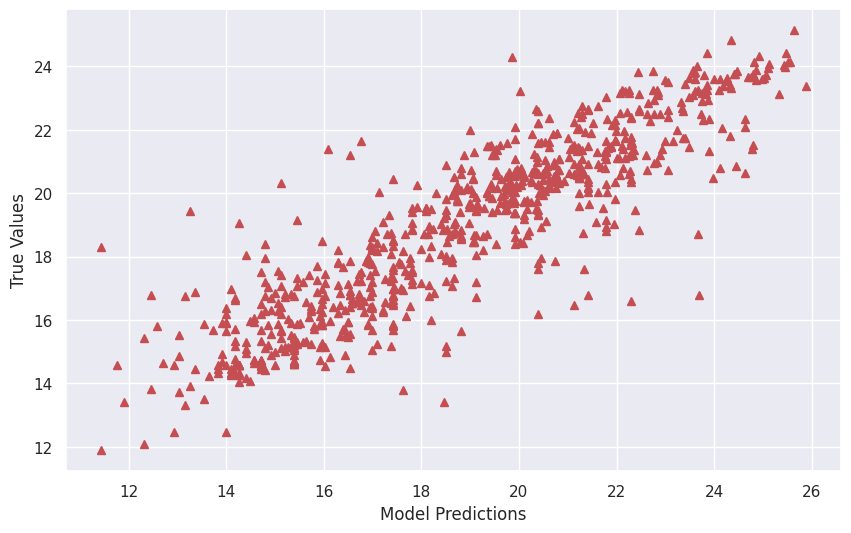

In [119]:
plt.plot(y_test, y_XGB_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [120]:
XGB.feature_importances_

array([0.00507909, 0.00447498, 0.04730881, 0.00553908, 0.00388196,
       0.0042395 , 0.02359634, 0.00265082, 0.01296363, 0.01236808,
       0.0164543 , 0.0027836 , 0.00647232, 0.00696066, 0.00360155,
       0.01090372, 0.00804858, 0.00539086, 0.01293452, 0.00431731,
       0.00512883, 0.0036955 , 0.00637186, 0.00895154, 0.01523648,
       0.00326472, 0.00652742, 0.00929328, 0.00305645, 0.00398797,
       0.6411728 , 0.0093671 , 0.0106831 , 0.03480658, 0.        ,
       0.00910428, 0.02119515, 0.00818718], dtype=float32)

In [121]:
importance = XGB.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['room_type_Entire home/apt', 'minimum_months', 'room_type_Shared room', 'accommodates', 'bath_type_shared', 'pool', 'total_baths', 'BBQ', 'Oven', 'gym', 'TV', 'room_type_Private room', 'room_type_Hotel room', 'neighbourhood_group_cleansed_North Region', 'bath_type_private']


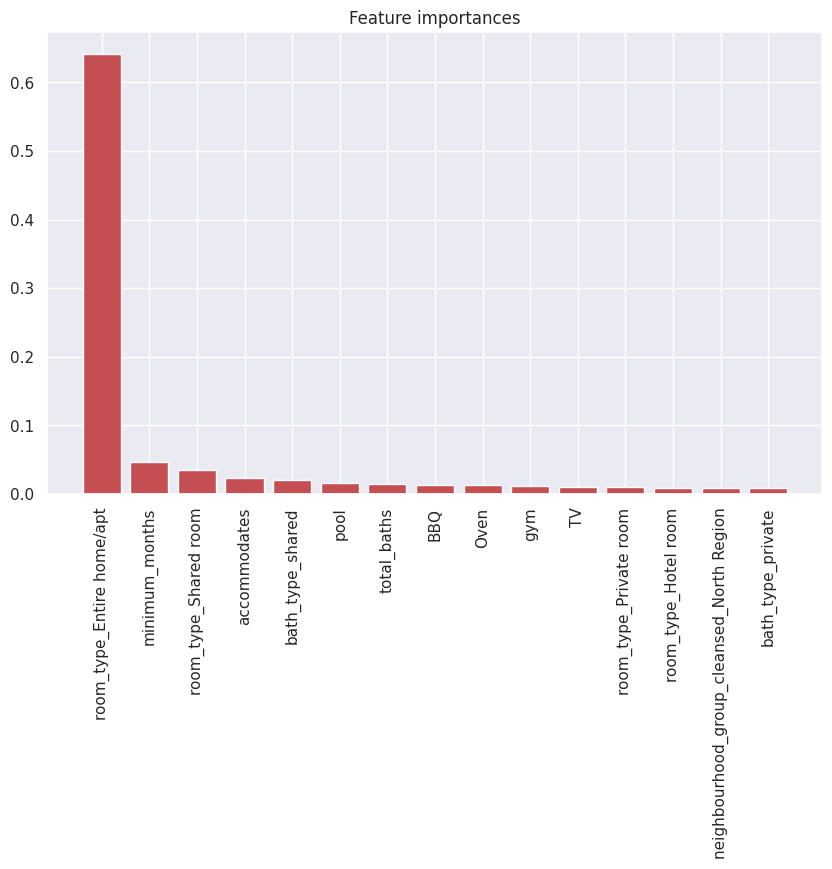

In [122]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [123]:
def XGB_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return XGB.predict(X_input)[0]

In [124]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [125]:
XGB_predicted_price_boxcox = XGB_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(XGB_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (XGB_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(XGB_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $18.227413177490234
The predicted sale price of the house is $3654.3322859314844


## AdaBoosting

### Modeling

In [126]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

AB = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='exponential', random_state=42)
AB.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100,
                  random_state=42)

### Evaluate

In [127]:
y_AB_pred = AB.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_AB_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.09108016261479211


In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_AB_pred)
mae = mean_absolute_error(y_test, y_AB_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 4.009661164883122
平均绝对误差MAE: 1.607819563775647


In [129]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_AB_pred)
print("R2 Score:", r2)

R2 Score: 0.5967838556911766


Text(0, 0.5, 'True Values')

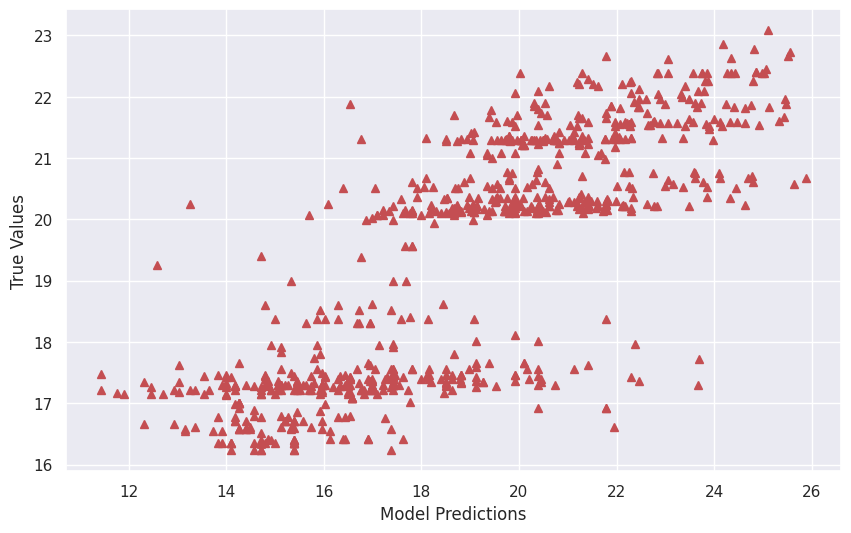

In [130]:
plt.plot(y_test, y_AB_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Make Prediction

In [131]:
def AB_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return XGB.predict(X_input)[0]

In [132]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [133]:
AB_predicted_price_boxcox = AB_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(AB_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (AB_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(AB_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $18.227413177490234
The predicted sale price of the house is $3654.3322859314844


## Gradient Boosting

### Modeling

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

# 定义超参数字典
params = {
    'learning_rate': 0.1,
    'loss': 'huber',
    'max_depth': 5,
    'min_samples_split': 6,
    'n_estimators': 200,
    'random_state': 42
}

# 初始化 GradientBoostingRegressor 模型并传递超参数
GB = GradientBoostingRegressor(**params)

# 使用 fit 方法拟合模型
GB.fit(X_train, y_train)


GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_split=6,
                          n_estimators=200, random_state=42)

使用了 GridSearchCV 来进行参数网格搜索，以寻找最佳的 LightGBM 模型参数配置。

In [135]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'n_estimators': [100, 200, 300],
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

# gs_knn = GridSearchCV(GB,
#                       param_grid=params,
#                       cv=5)

# gs_knn.fit(X_train, y_train)
# gs_knn.score(X_train, y_train)

# pred_y_train = GB.predict(X_train)
# pred_y_test = GB.predict(X_test)

# r2_train = metrics.r2_score(y_train, pred_y_train)
# r2_test = metrics.r2_score(y_test, pred_y_test)

# msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
# msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

# print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
# print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

# gs_knn.best_params_



# 42 分钟
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'n_estimators': [100, 200, 300],
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

# output


# 结果：
# Train r2 = 0.95
# Test r2 = 0.77
# Train msle = 0.00
# Test msle = 0.01
# {'learning_rate': 0.1,
#  'loss': 'huber',
#  'max_depth': 5,
#  'min_samples_split': 6,
#  'n_estimators': 200}

### Evaluate

In [136]:
y_GB_pred = GB.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_GB_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05698477503507398


In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_GB_pred)
mae = mean_absolute_error(y_test, y_GB_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 2.0644652713737934
平均绝对误差MAE: 1.0363296693477884


In [138]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_GB_pred)
print("R2 Score:", r2)

R2 Score: 0.7923949948506249


Text(0, 0.5, 'True Values')

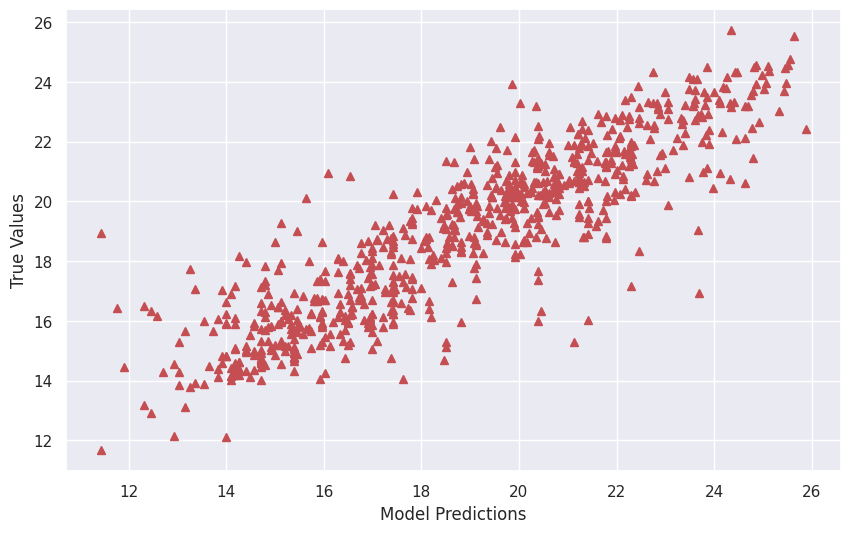

In [139]:
plt.plot(y_test, y_GB_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [140]:
GB.feature_importances_

array([6.04181064e-02, 3.58995650e-02, 1.46647858e-01, 1.38441483e-02,
       2.17500312e-02, 2.33327079e-02, 9.21042790e-02, 7.81431766e-04,
       6.56705983e-03, 1.36650694e-02, 1.67658597e-02, 2.91708326e-03,
       9.16531383e-04, 6.43182009e-03, 2.51096399e-03, 9.40371238e-03,
       1.67970214e-03, 4.29975511e-03, 1.24982332e-02, 2.95345852e-03,
       1.55519462e-03, 1.16145584e-03, 8.57330583e-03, 2.25013616e-02,
       3.70108926e-02, 5.20398680e-04, 1.56827637e-05, 8.53328304e-06,
       9.30471681e-04, 0.00000000e+00, 3.88966769e-01, 2.40504308e-03,
       7.26095877e-03, 2.30662810e-02, 2.69358770e-05, 8.49800610e-03,
       2.10430709e-02, 1.06826205e-03])

In [141]:
importance = GB.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['room_type_Entire home/apt', 'minimum_months', 'accommodates', 'latitude', 'total_baths', 'longitude', 'closest_mall_distance', 'room_type_Shared room', 'total_beds', 'distance_to_mrt', 'bath_type_shared', 'pool', 'maximum_months', 'gym', 'Oven']


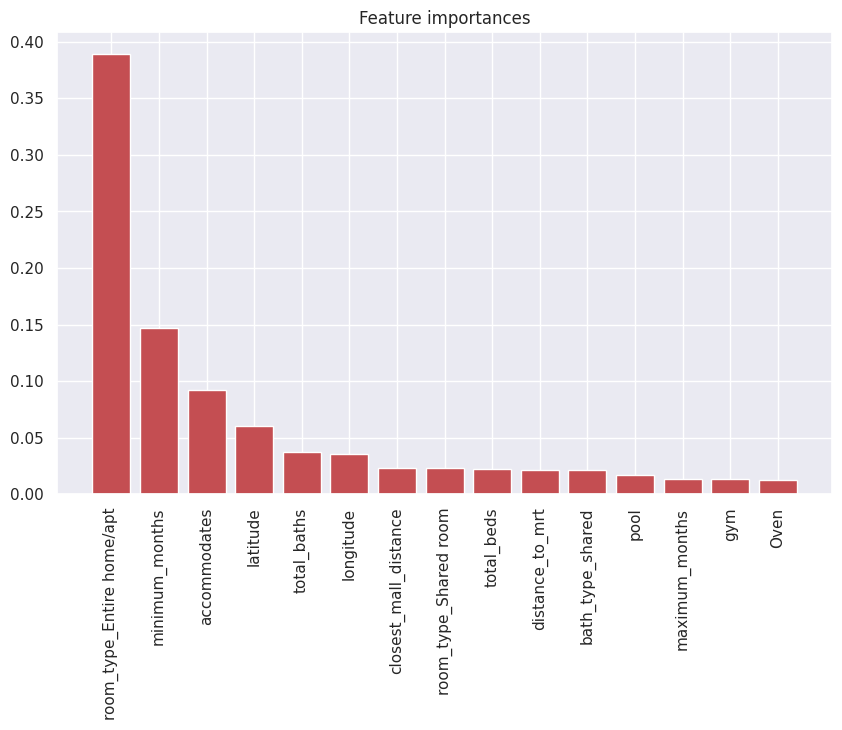

In [142]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [143]:
def GB_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return GB.predict(X_input)[0]

In [144]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [145]:
GB_predicted_price_boxcox = GB_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(GB_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (GB_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(GB_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted result of the model is $17.62685532425152
The predicted sale price of the house is $3159.002168443327


## LGBMRegressor

### Modeling

In [146]:
import lightgbm as lgb

LGBMR = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_samples=10,
    random_state=42,
    force_row_wise=True  # 或 force_col_wise=True
)
LGBMR.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 2361, number of used features: 38
[LightGBM] [Info] Start training from score 19.065009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMRegressor(force_row_wise=True, max_depth=5, min_child_samples=10,
              random_state=42)

使用了 GridSearchCV 来进行参数网格搜索，以寻找最佳的 LightGBM 模型参数配置。

In [147]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics

# params = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'max_depth': [5, 7, 9],
#     'min_child_samples': [20, 30, 40],
# }

# gs_knn = GridSearchCV(XGB,
#                       param_grid=params,
#                       cv=5)

# gs_knn.fit(X_train, y_train)
# gs_knn.score(X_train, y_train)

# pred_y_train = XGB.predict(X_train)
# pred_y_test = XGB.predict(X_test)

# r2_train = metrics.r2_score(y_train, pred_y_train)
# r2_test = metrics.r2_score(y_test, pred_y_test)

# msle_train =metrics.mean_squared_log_error(y_train, pred_y_train)
# msle_test =metrics.mean_squared_log_error(y_test, pred_y_test)

# print(f"Train r2 = {r2_train:.2f} \nTest r2 = {r2_test:.2f}")
# print(f"Train msle = {msle_train:.2f} \nTest msle = {msle_test:.2f}")

# gs_knn.best_params_


# 结果:
# Train r2 = 0.88
# Test r2 = 0.78
# Train msle = 0.00
# Test msle = 0.01
# {'learning_rate': 0.1,
#  'max_depth': 5,
#  'min_child_samples': 10,
#  'n_estimators': 100}

### Evaluate

In [148]:
y_LGBMR_pred = LGBMR.predict(X_test)

print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_LGBMR_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05765274443831132


In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_LGBMR_pred)
mae = mean_absolute_error(y_test, y_LGBMR_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 2.1170536280887267
平均绝对误差MAE: 1.0454754996810331


In [150]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_LGBMR_pred)
print("R2 Score:", r2)

R2 Score: 0.7871066491380638


Text(0, 0.5, 'True Values')

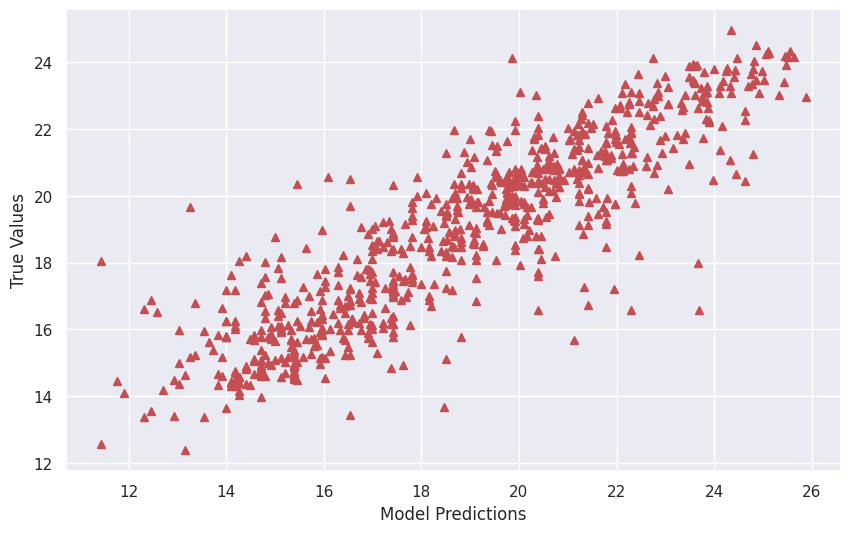

In [151]:
plt.plot(y_test, y_LGBMR_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [152]:
LGBMR.feature_importances_

array([299, 253,  92,  65, 184, 185, 138,   4,  15,  38,  46,  22,   4,
        35,  15,  39,  36,  16,  17,  19,  25,  11,  38,  81,  76,   3,
         0,   0,   2,   1,  21,  20,  11,  37,   0,  26,  29,  25],
      dtype=int32)

In [153]:
importance = LGBMR.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['latitude', 'longitude', 'closest_mall_distance', 'distance_to_mrt', 'accommodates', 'minimum_months', 'total_beds', 'total_baths', 'maximum_months', 'pool', 'TV', 'total_bedrooms', 'gym', 'room_type_Shared room', 'refrigerator']


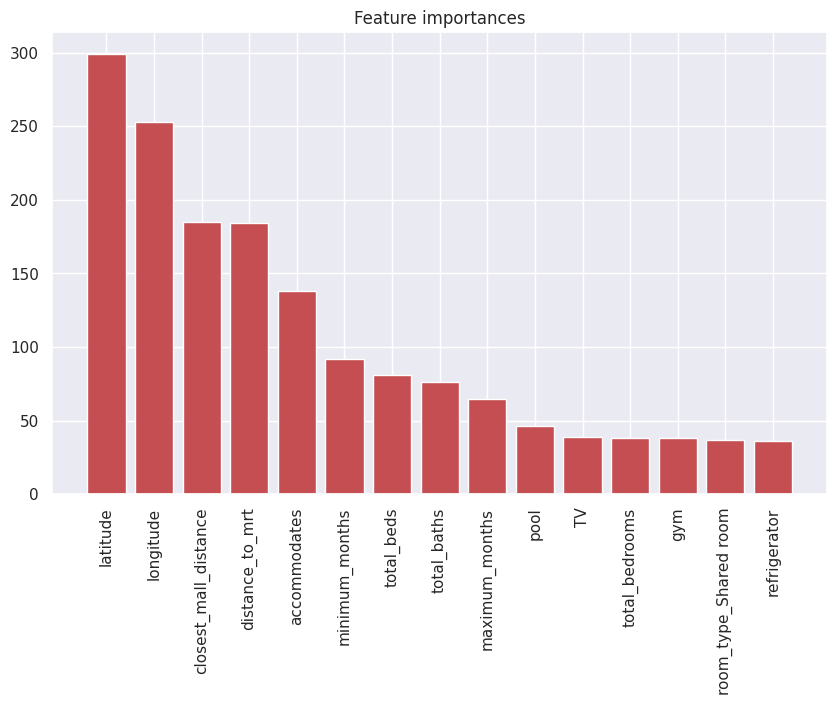

In [154]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [155]:
def LGBMR_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return LGBMR.predict(X_input)[0]

In [156]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [157]:
LGBMR_predicted_price_boxcox = LGBMR_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(LGBMR_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (LGBMR_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(LGBMR_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
The predicted result of the model is $17.235135003080394
The predicted sale price of the house is $2866.8628116539053


# Ensemble

## Stacking

### Modeling

In [158]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# 定义堆叠模型
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', rfr),
        ('svm', svm),
        ('xgboost', XGB),
        ('gradient_boosting', GB),
        ('lgbm', LGBMR)
    ],
    final_estimator=Ridge(alpha=2.0)  # 选择一个适当的堆叠模型
)

# 生成单一模型的预测结果
train_predictions = {
    'random_forest': rfr.predict(X_train),
    'svm': svm.predict(X_train),
    'xgboost': XGB.predict(X_train),
    'gradient_boosting': GB.predict(X_train),
    'lgbm': LGBMR.predict(X_train)
}

test_predictions = {
    'random_forest': rfr.predict(X_test),
    'svm': svm.predict(X_test),
    'xgboost': XGB.predict(X_test),
    'gradient_boosting': GB.predict(X_test),
    'lgbm': LGBMR.predict(X_test)
}

# 训练堆叠模型
stacking_model.fit(X_train, y_train)

# 生成最终预测结果
y_stack_pred = stacking_model.predict(X_test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 2361, number of used features: 38
[LightGBM] [Info] Start training from score 19.065009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


使用了 GridSearchCV 来进行参数网格搜索，以寻找最佳的 LightGBM 模型参数配置。

In [159]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# # 定义堆叠模型
# stacking_model = StackingRegressor(
#     estimators=[
#         ('random_forest', rfr),
#         ('svm', svm),
#         ('xgboost', XGB),
#         ('gradient_boosting', GB),
#         ('lgbm', LGBMR)
#     ],
#     final_estimator=Ridge()  # 使用Ridge回归作为最终估计器
# )

# # 定义超参数网格
# param_grid = {
#     'final_estimator__alpha': [0.1, 0.5, 1.0, 2.0],
#     # 在这里可以添加基本模型的超参数调优
# }

# # 使用GridSearchCV进行超参数调优
# grid_search = GridSearchCV(stacking_model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # 输出最佳超参数
# print("Best Parameters: ", grid_search.best_params_)

# # 生成最终预测结果
# y_stack_pred = grid_search.predict(X_test)


### Evaluate

In [160]:
print("平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）：", mean_absolute_percentage_error(y_test, y_stack_pred))

平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）： 0.05395230233910568


In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_stack_pred)
mae = mean_absolute_error(y_test, y_stack_pred)

print("均方误差MSE:", mse)
print("平均绝对误差MAE:", mae)

均方误差MSE: 1.89531310440559
平均绝对误差MAE: 0.9802356326966737


In [162]:
# 决定系数（Coefficient of Determination，R2 Score）
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_stack_pred)
print("R2 Score:", r2)

R2 Score: 0.8094051315583708


Text(0, 0.5, 'True Values')

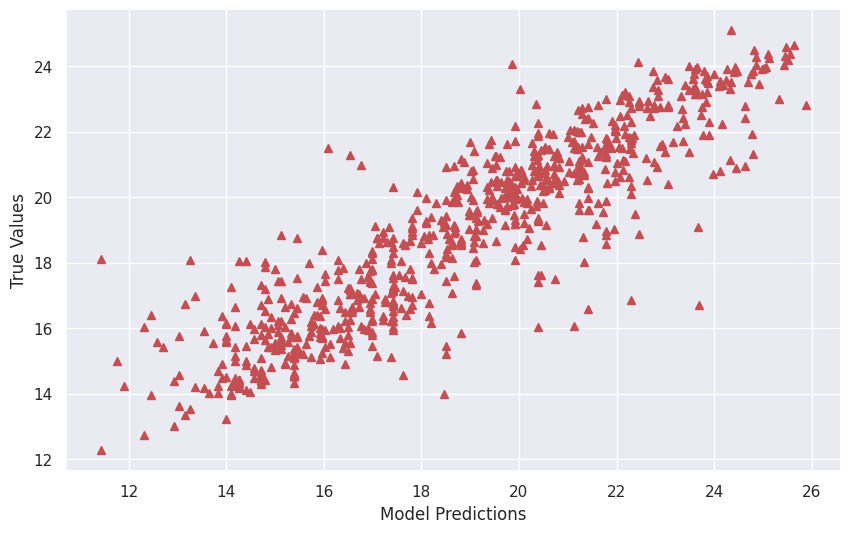

In [163]:
plt.plot(y_test, y_stack_pred, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Feature Importance

In [171]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# 训练各个基础模型
rfr.fit(X_train, y_train)
svm.fit(X_train, y_train)
XGB.fit(X_train, y_train)
GB.fit(X_train, y_train)
LGBMR.fit(X_train, y_train)

# 获取各个基础模型的特征重要性
rfr_feature_importance = rfr.feature_importances_
svm_feature_importance = svm.coef_ if hasattr(svm, 'coef_') else None  # 如果是线性SVM才获取系数
xgb_feature_importance = XGB.feature_importances_
gb_feature_importance = GB.feature_importances_
lgbm_feature_importance = LGBMR.feature_importances_

# 汇总各个模型的特征重要性并忽略缺失值
feature_importances = [rfr_feature_importance, svm_feature_importance, xgb_feature_importance, gb_feature_importance, lgbm_feature_importance]

# 获取特征名称
feature_names = X.columns


# 初始化特征重要性汇总
feature_importance_summary = np.zeros(len(feature_names))

for importance in feature_importances:
    if importance is not None:
        feature_importance_summary += importance

# 对特征重要性进行排序
sorted_feature_indices = np.argsort(feature_importance_summary)[::-1]

# 打印特征重要性
for idx in sorted_feature_indices:
    print(f"Feature: {feature_names[idx]}, Importance: {feature_importance_summary[idx]}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 2361, number of used features: 38
[LightGBM] [Info] Start training from score 19.065009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

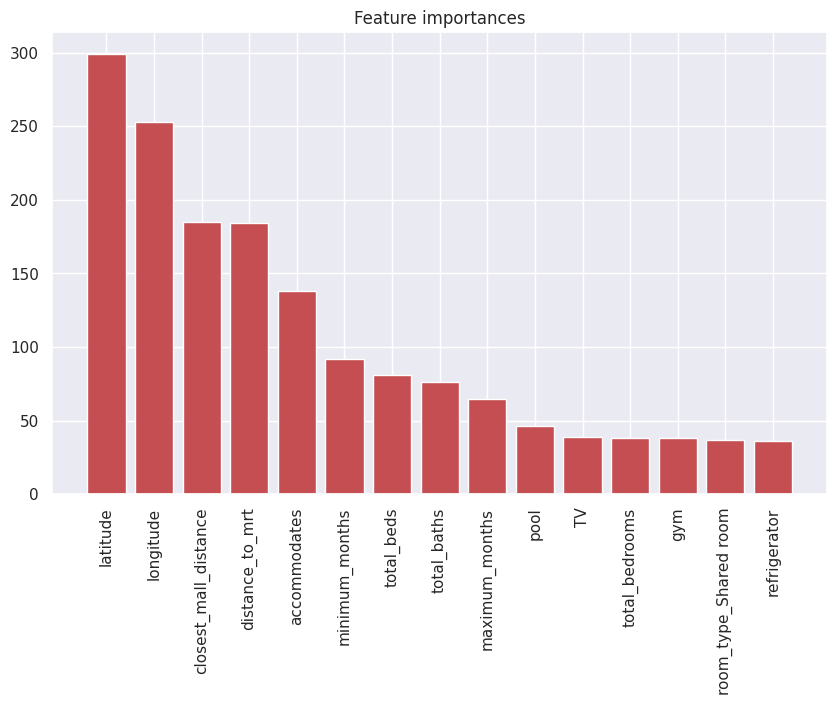

In [173]:
import matplotlib.pyplot as plt

# 假设您已经获得了排好序的特征重要性和特征名称
top_features = 15  # 想要显示的前N个重要特征

# 选择前N个最重要的特征和其重要性值
top_feature_indices = sorted_feature_indices[:top_features]
top_feature_importance = feature_importance_summary[top_feature_indices]

# 选择前N个最重要的特征名称
top_feature_names = [feature_names[idx] for idx in top_feature_indices]

# 创建柱状图
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

### Make Prediction

In [174]:
def stack_predict_input(single_input):
    prediction_input_df = pd.DataFrame([single_input])

    # 分类numeric_cols和text_cols
    prediction_numeric_cols = prediction_input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    prediction_text_cols = prediction_input_df.select_dtypes('object').columns.tolist()
    # 缺失值填充
    imputer = np.nanmean(prediction_input_df[prediction_numeric_cols], axis=0)
    prediction_input_df[prediction_numeric_cols] = np.where(np.isnan(prediction_input_df[prediction_numeric_cols]), imputer, prediction_input_df[prediction_numeric_cols])
    # 独热编码
    prediction_encoded_cols = list(encoder.get_feature_names_out(prediction_text_cols))
    prediction_input_df[prediction_encoded_cols] = encoder.transform(prediction_input_df[prediction_text_cols].values)

    x_input = prediction_input_df[prediction_numeric_cols + prediction_encoded_cols]
    # 归一化
    X_input = scaler.transform(x_input)
    return stacking_model.predict(X_input)[0]

In [175]:
sample_input = { 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room', 'minimum_months':3, 'maximum_months':15,
                'distance_to_mrt':0.103788983637186, 'closest_mall_distance':0.108991191077176, 'accommodates':4, 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1,
                'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1, 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1,
                'total_baths':1, 'bath_type':'Shared', }

# sample_input = { 'types':'condo', 'neighbourhood_cleansed':'Newton', 'neighbourhood_group_cleansed':'Central Region', 'latitude':1.29585, 'longitude':103.84597, 'room_type':'Private room',
#                 'minimum_months':3, 'maximum_months':15 ,'distance_to_mrt':0.103788983637186, 'closest_mrt_name':'TANJONG PAGAR MRT STATION', 'closest_mrt_stop_id':'EW15',
#                 'closest_mall_distance':0.108991191077176, 'closest_mall_name':'Guoco Tower', 'accommodates':4, 'closest_mall_address':'1 Wallich St, Singapore 078881',
#                 'conditioning':1, 'BBQ':1, 'gym':1, 'pool':1, 'dryer':1, 'Wifi':1, 'kitchen':1, 'Backyard':0, 'TV':0, 'refrigerator':1, 'Microwave':1, 'Oven':0, 'Pets':1,
#                 'stove':1, 'fan':1, 'total_bedrooms':1, 'total_beds':1, 'total_baths':1, 'bath_type':'Shared', 'studio':0 }

In [176]:
stack_predicted_price_boxcox = stack_predict_input(sample_input)
print('The predicted result of the model is ${}'.format(stack_predicted_price_boxcox))

# 对模型输出结果进行 Box-Cox 反变换
if lambda_value != 0:
    predicted_price = (stack_predicted_price_boxcox * lambda_value + 1) ** (1 / lambda_value)
else:
    predicted_price = np.exp(stack_predicted_price_boxcox) - 1
print('The predicted sale price of the house is ${}'.format(predicted_price))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
The predicted result of the model is $18.25189483252624
The predicted sale price of the house is $3675.8095229862415
